### Import Necessary Packages

In [2]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

In [3]:
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#machine learning model
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [5]:
#model eveluation
from sklearn.metrics import roc_curve, precision_recall_curve 
from sklearn.metrics import classification_report, precision_recall_curve, roc_auc_score

In [6]:
import lightgbm as lgb  
import catboost as cb

In [7]:
print(f"Pandas version: {pd.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")

Pandas version: 2.2.2
Scikit-learn version: 1.5.1


In [8]:
pwd

'/Users/sadmansakib/Downloads/AdvanceML/adv_mla_at2_exp/notebooks/predictive'

### Loading and Exploring Datasets 

In [167]:
df_train = pd.read_csv('../../data/raw/sales_train.csv')
df_test = pd.read_csv('../../data/raw/sales_test.csv')
df_item = pd.read_csv('../../data/raw/items_weekly_sell_prices.csv')
df_calendar_events = pd.read_csv('../../data/raw/calendar_events.csv')
df_calendar = pd.read_csv('../../data/raw/calendar.csv')

In [169]:
df_train.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1532,d_1533,d_1534,d_1535,d_1536,d_1537,d_1538,d_1539,d_1540,d_1541
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,1,0,1,0,1,0,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,8,2,0,8,2,3,1,1,3,8
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,0,1,3,2,1,1,2,2,3


In [171]:
df_test.head()

,d_1542,d_1543,d_1544,d_1545,d_1546,d_1547,d_1548,d_1549,d_1550,d_1551,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,0,1,0,2,1,0,2,0,1,0,...,2,4,0,0,0,0,3,3,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,1,2,1,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,4,1,0,1,3,5,2,3,0,2,...,1,1,0,4,0,1,3,0,2,6
4,3,0,0,1,1,0,2,0,2,1,...,0,0,0,2,1,0,0,2,1,0


In [173]:
df_item.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [175]:
df_item.shape

(6841121, 4)

In [177]:
df_calendar.head()

,date,wm_yr_wk,d
0,2011-01-29,11101,d_1
1,2011-01-30,11101,d_2
2,2011-01-31,11101,d_3
3,2011-02-01,11101,d_4
4,2011-02-02,11101,d_5


In [179]:
df_calendar_events.head()

,date,event_name,event_type
0,2011-02-06,SuperBowl,Sporting
1,2011-02-14,ValentinesDay,Cultural
2,2011-02-21,PresidentsDay,National
3,2011-03-09,LentStart,Religious
4,2011-03-16,LentWeek2,Religious


In [181]:
null_counts = df_calendar_events.isnull().sum()
print(null_counts)

date          0
event_name    0
event_type    0
dtype: int64


In [183]:
null_counts = df_item.isnull().sum()
print(null_counts)

store_id      0
item_id       0
wm_yr_wk      0
sell_price    0
dtype: int64


In [184]:
min_price = df_item['sell_price'].min()
max_price = df_item['sell_price'].max()

print(f"The range of sell_price is from {min_price} to {max_price}")

The range of sell_price is from 0.01 to 107.32


In [187]:
price_stats = df_item['sell_price'].describe()
print(price_stats)

count    6.841121e+06
mean     4.410952e+00
std      3.408814e+00
min      1.000000e-02
25%      2.180000e+00
50%      3.470000e+00
75%      5.840000e+00
max      1.073200e+02
Name: sell_price, dtype: float64


In [189]:
# Melt training dataset  to long format
df_train_long = df_train.melt(
    id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'],
    var_name='d',
    value_name='sales'
)

# Display the first few rows
print(df_train_long.head())

                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id    d  sales  
0       CA  d_1      0  
1       CA  d_1      0  
2       CA  d_1      0  
3       CA  d_1      0  
4       CA  d_1      0  


In [191]:
df_train_long.shape

(46985090, 8)

In [193]:
null_counts = df_train_long.isnull().sum()
print(null_counts)

id          0
item_id     0
dept_id     0
cat_id      0
store_id    0
state_id    0
d           0
sales       0
dtype: int64


In [195]:
unique_sales_count = df_train_long['sales'].nunique()
print(f"Number of unique values in 'sales' column: {unique_sales_count}")

# to see the unique values
unique_sales_values = df_train_long['sales'].unique()
print("Unique values in 'sales' column:")
print(unique_sales_values)

Number of unique values in 'sales' column: 419
Unique values in 'sales' column:
[  0  12   2   4   5   9   3   1  25  45  10   8   7  16  54   6  50  14
  11  17  15  23  13  20  19  38  32  21  30  33 107  51  26 147  22  43
  24  35  27  42  49  36  18  37 116  56  28  34  41  31  39  44 108  55
 360  62  69  75 125  53  47  29 164  52 102  63  98  59 203 152  65 115
  46  57  90  58  78  64 130  60 208  93  61  40  73 182 198 121 132 436
 123 215 160  85 112 141  79  48 153 204  70  67  92  86 207  74  94  66
  91 128  84  71  83  72 119  76  99 134  80  89 106 120 323 127 139 109
 140 114 296 314 159  96  82  81 180 137 171 100 279 316 150  97 169  68
  87 174 188 195 124 202 175 370 118 200 136 187 250 104 367 178  95  88
 214 186 385 105  77 177 184 162 103 228 331 353 101 154 126 258 117 151
 163 133 149 110 135 122 111 113 158 138 294 129 146 131 142 166 148 144
 145 634 167 172 191 143 161 192 193 179 262 189 168 420 155 280 273 254
 240 156 336 478 210 359 234 170 249 227 460

In [197]:
# Merge training dataset with calendar datset
df_train_long = df_train_long.merge(df_calendar, on='d', how='left')

print(df_train_long.head())

                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id    d  sales        date  wm_yr_wk  
0       CA  d_1      0  2011-01-29     11101  
1       CA  d_1      0  2011-01-29     11101  
2       CA  d_1      0  2011-01-29     11101  
3       CA  d_1      0  2011-01-29     11101  
4       CA  d_1      0  2011-01-29     11101  


In [199]:
min_price = df_train_long['sales'].min()
max_price = df_train_long['sales'].max()

print(f"The range of sell_price is from {min_price} to {max_price}")

The range of sell_price is from 0 to 763


In [201]:
# Merge training dataset with item datset
df_train_long = df_train_long.merge(
    df_item,
    on=['store_id', 'item_id', 'wm_yr_wk'],
    how='left'
)


print(df_train_long.head())

                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id    d  sales        date  wm_yr_wk  sell_price  
0       CA  d_1      0  2011-01-29     11101         NaN  
1       CA  d_1      0  2011-01-29     11101         NaN  
2       CA  d_1      0  2011-01-29     11101         NaN  
3       CA  d_1      0  2011-01-29     11101         NaN  
4       CA  d_1      0  2011-01-29     11101         NaN  


In [203]:
# Check for missing sell_price values
missing_sell_price = df_train_long['sell_price'].isnull().sum()
total_rows = len(df_train_long)
print(f"Missing 'sell_price': {missing_sell_price} out of {total_rows} rows")

Missing 'sell_price': 12264399 out of 46985090 rows


In [205]:
df_train_long.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,sell_price
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN


In [207]:
# Range in df_train_long
wm_yr_wk_train_min = df_train_long['wm_yr_wk'].min()
wm_yr_wk_train_max = df_train_long['wm_yr_wk'].max()
print(f"df_train_long wm_yr_wk range: {wm_yr_wk_train_min} - {wm_yr_wk_train_max}")

# Range in df_item
wm_yr_wk_item_min = df_item['wm_yr_wk'].min()
wm_yr_wk_item_max = df_item['wm_yr_wk'].max()
print(f"df_item wm_yr_wk range: {wm_yr_wk_item_min} - {wm_yr_wk_item_max}")

df_train_long wm_yr_wk range: 11101 - 11512
df_item wm_yr_wk range: 11101 - 11621


In [209]:
count = (df_item['wm_yr_wk'] == 11512).sum()

print(f"Number of times 11512 appears in df_item['wm_yr_wk']: {count}")

Number of times 11512 appears in df_item['wm_yr_wk']: 30063


In [211]:
count = (df_train_long['wm_yr_wk'] == 11512).sum()

print(f"Number of times 11512 appears in df_train_long['wm_yr_wk']: {count}")

Number of times 11512 appears in df_train_long['wm_yr_wk']: 30490


In [213]:
is_present = 11512 in df_item['wm_yr_wk'].values

print(f"Is 11512 present in df_item['wm_yr_wk']: {is_present}")

Is 11512 present in df_item['wm_yr_wk']: True


In [215]:
# Weeks in df_train_long not in df_item
wm_yr_wk_diff = set(df_train_long['wm_yr_wk']) - set(df_item['wm_yr_wk'])
print(f"Number of wm_yr_wk in df_train_long not in df_item: {len(wm_yr_wk_diff)}")

Number of wm_yr_wk in df_train_long not in df_item: 0


In [216]:
# List of sample missing combinations
missing_keys_sample = [
    {'store_id': 'WI_3', 'item_id': 'HOUSEHOLD_2_313', 'wm_yr_wk': 11512},
    {'store_id': 'WI_3', 'item_id': 'HOUSEHOLD_2_318', 'wm_yr_wk': 11512},
    {'store_id': 'WI_3', 'item_id': 'FOODS_2_253', 'wm_yr_wk': 11512},
    {'store_id': 'WI_3', 'item_id': 'FOODS_3_006', 'wm_yr_wk': 11512},
    {'store_id': 'WI_3', 'item_id': 'FOODS_3_777', 'wm_yr_wk': 11512},
]

# Check if these combinations exist in df_item
for key in missing_keys_sample:
    exists = df_item[
        (df_item['store_id'] == key['store_id']) &
        (df_item['item_id'] == key['item_id']) &
        (df_item['wm_yr_wk'] == key['wm_yr_wk'])
    ]
    if exists.empty:
        print(f"Combination not found in df_item: {key}")
    else:
        print(f"Combination found in df_item: {key}")

Combination not found in df_item: {'store_id': 'WI_3', 'item_id': 'HOUSEHOLD_2_313', 'wm_yr_wk': 11512}
Combination not found in df_item: {'store_id': 'WI_3', 'item_id': 'HOUSEHOLD_2_318', 'wm_yr_wk': 11512}
Combination not found in df_item: {'store_id': 'WI_3', 'item_id': 'FOODS_2_253', 'wm_yr_wk': 11512}
Combination not found in df_item: {'store_id': 'WI_3', 'item_id': 'FOODS_3_006', 'wm_yr_wk': 11512}
Combination not found in df_item: {'store_id': 'WI_3', 'item_id': 'FOODS_3_777', 'wm_yr_wk': 11512}


**Observation** The wm_yr_wk value 11512 exists in df_item, but not for these specific combinations.

**Incomplete Price Data** df_item may not have price data for all items in all stores for every week.

**Items are not sold in certain stores** Some items might not be sold in certain stores during specific weeks.

**Data Collection Gaps** There could be gaps in the data due to collection or recording issues.

count    3.472069e+07
mean     4.383804e+00
std      3.358138e+00
min      1.000000e-02
25%      2.080000e+00
50%      3.440000e+00
75%      5.840000e+00
max      1.073200e+02
Name: sell_price, dtype: float64


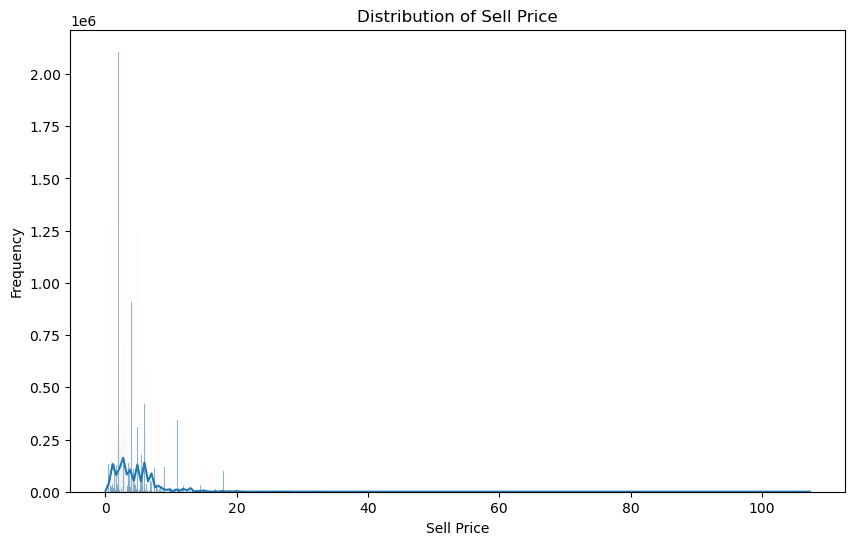

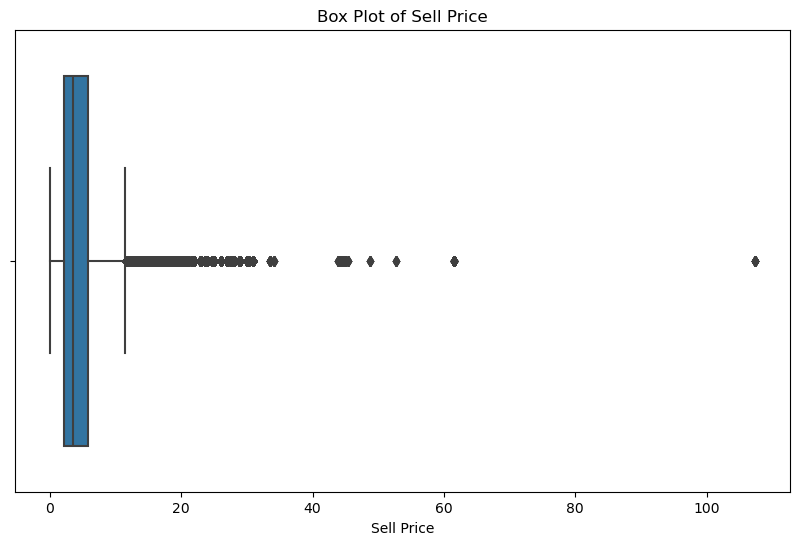


Top 10 most frequent sell prices:
1.98    1307605
2.98    1255761
3.98     917414
2.50     880860
3.97     873746
1.00     838209
4.97     814334
1.97     795714
2.48     673167
2.97     614473
Name: sell_price, dtype: int64


In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(df_train_long['sell_price'].describe())

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_train_long['sell_price'], kde=True)
plt.title('Distribution of Sell Price')
plt.xlabel('Sell Price')
plt.ylabel('Frequency')
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train_long['sell_price'])
plt.title('Box Plot of Sell Price')
plt.xlabel('Sell Price')
plt.show()

# Display top 10 most frequent values
print("\nTop 10 most frequent sell prices:")
print(df_train_long['sell_price'].value_counts().nlargest(10))

In [219]:
# Calculate the average sell_price for each item_id across all stores and weeks
item_avg_price = df_item.groupby('item_id')['sell_price'].mean()
# Fill remaining missing sell_price with item average price
df_train_long['sell_price'] = df_train_long.apply(
    lambda row: item_avg_price[row['item_id']] if pd.isnull(row['sell_price']) else row['sell_price'],
    axis=1
)
# Check remaining missing values
missing_sell_price = df_train_long['sell_price'].isnull().sum()
print(f"Missing 'sell_price' after filling with item average price: {missing_sell_price}")

Missing 'sell_price' after filling with item average price: 0


In [221]:
# Calculate sales revenue
df_train_long['revenue'] = df_train_long['sales'] * df_train_long['sell_price']


print(df_train_long[['sales', 'sell_price', 'revenue']].head())

   sales  sell_price  revenue
0      0    8.298076      0.0
1      0    3.967459      0.0
2      0    2.965733      0.0
3      0    4.502845      0.0
4      0    2.880902      0.0


In [223]:
# Merge df_train_long with df_calendar_events
df_train_long = df_train_long.merge(
    df_calendar_events,
    on='date',
    how='left'
)


print(df_train_long.head())

                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id    d  sales        date  wm_yr_wk  sell_price  revenue event_name  \
0       CA  d_1      0  2011-01-29     11101    8.298076      0.0        NaN   
1       CA  d_1      0  2011-01-29     11101    3.967459      0.0        NaN   
2       CA  d_1      0  2011-01-29     11101    2.965733      0.0        NaN   
3       CA  d_1      0  2011-01-29     11101    4.502845      0.0        NaN   
4       CA  d_1      0  2011-01-29     11101    2.880902      0.0        NaN   

  event_type  
0        NaN  
1       

In [225]:
null_counts = df_train_long.isnull().sum()
print(null_counts)

id                   0
item_id              0
dept_id              0
cat_id               0
store_id             0
state_id             0
d                    0
sales                0
date                 0
wm_yr_wk             0
sell_price           0
revenue              0
event_name    43143350
event_type    43143350
dtype: int64


In [227]:
# checking  testing  and training datasets have the same number of rows.
assert len(df_test) == len(df_train)

# Copy identifier columns from df_train to df_test
for col in ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']:
    df_test[col] = df_train[col]

# Reorder columns to have identifiers first
df_test = df_test[['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'] + [col for col in df_test.columns if col.startswith('d_')]]

print(df_test.head())

                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1542  d_1543  d_1544  d_1545  ...  d_1932  d_1933  d_1934  \
0       CA       0       1       0       2  ...       2       4       0   
1       CA       0       0       0       0  ...       0       1       2   
2       CA       0       0       0       0  ...       1       0       2   
3       CA       4       1       0       1  ...       1       1       0   
4       CA       3       0       0       1  ...       0       0       0   

   d_1935  d_1936  d_1937  d_1938  d_1939  d_1940  d_1941  
0       

In [229]:
# Melt df_test to long format
df_test_long = df_test.melt(
    id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'],
    var_name='d',
    value_name='sales'
)

# Display the first few rows
print(df_test_long.head())

                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id       d  sales  
0       CA  d_1542      0  
1       CA  d_1542      0  
2       CA  d_1542      0  
3       CA  d_1542      4  
4       CA  d_1542      3  


In [231]:
# Merge df_test_long with df_calendar
df_test_long = df_test_long.merge(df_calendar, on='d', how='left')

# Merge df_test_long with df_item
df_test_long = df_test_long.merge(
    df_item,
    on=['store_id', 'item_id', 'wm_yr_wk'],
    how='left'
)

# Display the first few rows
print(df_test_long.head())

                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id       d  sales        date  wm_yr_wk  sell_price  
0       CA  d_1542      0  2015-04-19     11512        8.26  
1       CA  d_1542      0  2015-04-19     11512        3.97  
2       CA  d_1542      0  2015-04-19     11512        2.97  
3       CA  d_1542      4  2015-04-19     11512        4.64  
4       CA  d_1542      3  2015-04-19     11512        2.88  


In [233]:
null_counts = df_test_long.isnull().sum()
print(null_counts)

id                0
item_id           0
dept_id           0
cat_id            0
store_id          0
state_id          0
d                 0
sales             0
date              0
wm_yr_wk          0
sell_price    35014
dtype: int64


In [235]:
# Calculate the average sell_price for each item_id across all stores and weeks
item_avg_price = df_item.groupby('item_id')['sell_price'].mean()
# Fill remaining missing sell_price with item average price
df_test_long['sell_price'] = df_test_long.apply(
    lambda row: item_avg_price[row['item_id']] if pd.isnull(row['sell_price']) else row['sell_price'],
    axis=1
)
# Check remaining missing values
missing_sell_price = df_test_long['sell_price'].isnull().sum()
print(f"Missing 'sell_price' after filling with item average price: {missing_sell_price}")

Missing 'sell_price' after filling with item average price: 0


In [237]:
# Calculate revenue
df_test_long['revenue'] = df_test_long['sales'] * df_test_long['sell_price']


print(df_test_long.head())

                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id       d  sales        date  wm_yr_wk  sell_price  revenue  
0       CA  d_1542      0  2015-04-19     11512        8.26     0.00  
1       CA  d_1542      0  2015-04-19     11512        3.97     0.00  
2       CA  d_1542      0  2015-04-19     11512        2.97     0.00  
3       CA  d_1542      4  2015-04-19     11512        4.64    18.56  
4       CA  d_1542      3  2015-04-19     11512        2.88     8.64  


In [239]:
# Merge with df_calendar_events
df_test_long = df_test_long.merge(df_calendar_events, on='date', how='left')


print(df_test_long.head())

                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id       d  sales        date  wm_yr_wk  sell_price  revenue  \
0       CA  d_1542      0  2015-04-19     11512        8.26     0.00   
1       CA  d_1542      0  2015-04-19     11512        3.97     0.00   
2       CA  d_1542      0  2015-04-19     11512        2.97     0.00   
3       CA  d_1542      4  2015-04-19     11512        4.64    18.56   
4       CA  d_1542      3  2015-04-19     11512        2.88     8.64   

  event_name event_type  
0        NaN        NaN  
1        NaN        NaN  
2       

In [241]:
null_counts = df_test_long.isnull().sum()
print(null_counts)

id                   0
item_id              0
dept_id              0
cat_id               0
store_id             0
state_id             0
d                    0
sales                0
date                 0
wm_yr_wk             0
sell_price           0
revenue              0
event_name    11220320
event_type    11220320
dtype: int64


In [243]:
df_test_long.shape

(12196000, 14)

In [245]:
# Fill NaN values with 'NoEvent'
df_train_long = df_train_long.copy() 
df_train_long['event_name'] = df_train_long['event_name'].fillna('NoEvent')
df_train_long['event_type'] = df_train_long['event_type'].fillna('NoEvent')

In [247]:
# Fill NaN values with 'NoEvent'
df_test_long = df_test_long.copy() 
df_test_long['event_name'] = df_test_long['event_name'].fillna('NoEvent')
df_test_long['event_type'] = df_test_long['event_type'].fillna('NoEvent')


In [249]:
null_counts = df_test_long.isnull().sum()
print(null_counts)

id            0
item_id       0
dept_id       0
cat_id        0
store_id      0
state_id      0
d             0
sales         0
date          0
wm_yr_wk      0
sell_price    0
revenue       0
event_name    0
event_type    0
dtype: int64


## Feature Engineering

In [105]:
df_train_long.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,sell_price,revenue,event_name,event_type
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,8.298076,0.0,NoEvent,NoEvent
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,3.967459,0.0,NoEvent,NoEvent
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,2.965733,0.0,NoEvent,NoEvent
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,4.502845,0.0,NoEvent,NoEvent
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,2.880902,0.0,NoEvent,NoEvent


In [107]:
df_train_long.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47107050 entries, 0 to 47107049
Data columns (total 14 columns):
 #   Column      Dtype  
---  ------      -----  
 0   id          object 
 1   item_id     object 
 2   dept_id     object 
 3   cat_id      object 
 4   store_id    object 
 5   state_id    object 
 6   d           object 
 7   sales       int64  
 8   date        object 
 9   wm_yr_wk    int64  
 10  sell_price  float64
 11  revenue     float64
 12  event_name  object 
 13  event_type  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 5.3+ GB


In [109]:
def count_unique_identities(df):
    # Filter the DataFrame to only include object-type columns
    object_columns = df.select_dtypes(include=['object']).columns
    
    # Create a dictionary to store the column name and the number of unique values
    unique_counts = {col: df[col].nunique() for col in object_columns}
    
    # Return the dictionary with the counts
    return unique_counts

# Usage with df_train_long
unique_values = count_unique_identities(df_train_long)

# Display the unique counts for each object-type column
for column, count in unique_values.items():
    print(f"Column '{column}' has {count} unique values.")

Column 'id' has 30490 unique values.
Column 'item_id' has 3049 unique values.
Column 'dept_id' has 7 unique values.
Column 'cat_id' has 3 unique values.
Column 'store_id' has 10 unique values.
Column 'state_id' has 3 unique values.
Column 'd' has 1541 unique values.
Column 'date' has 1541 unique values.
Column 'event_name' has 31 unique values.
Column 'event_type' has 5 unique values.


#### Analyzing products department and category 

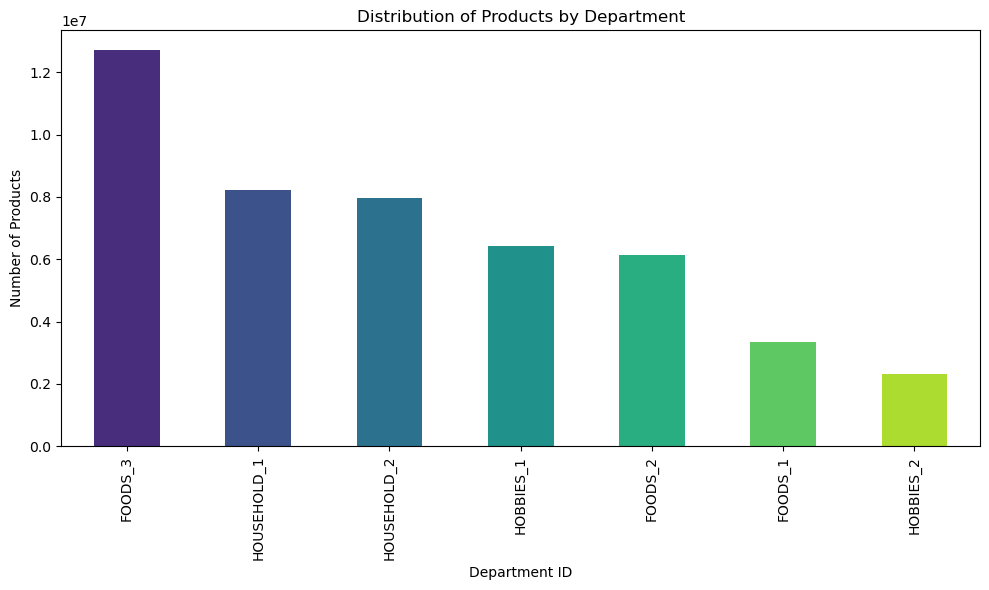

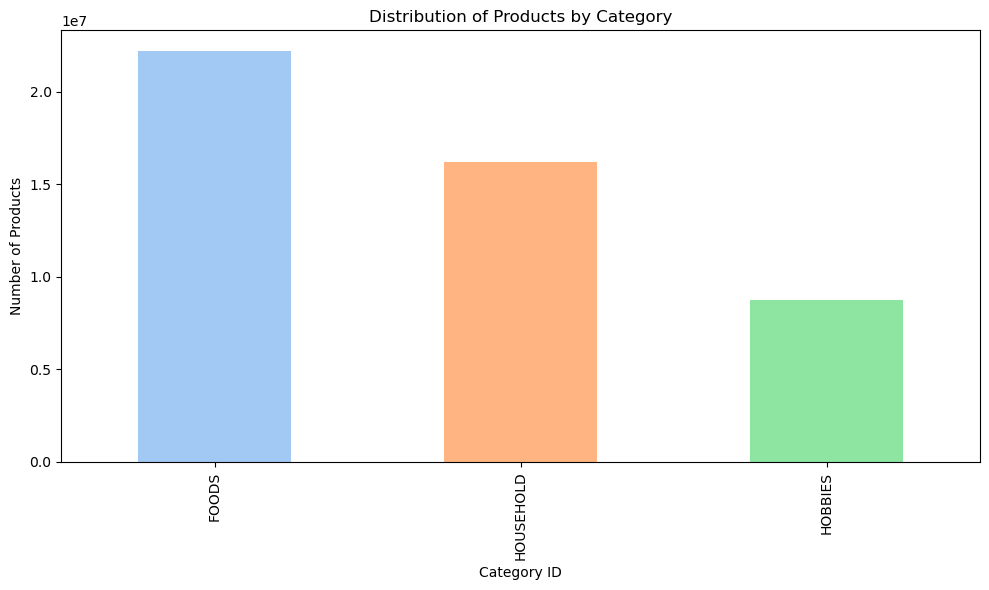

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution by dept_id
plt.figure(figsize=(10, 6))
palette_dept = sns.color_palette("viridis", n_colors=len(df_train_long['dept_id'].unique()))
dept_counts = df_train_long['dept_id'].value_counts()
dept_counts.plot(kind='bar', color=dept_counts.index.map(dict(zip(dept_counts.index, palette_dept))))
plt.title('Distribution of Products by Department')
plt.xlabel('Department ID')
plt.ylabel('Number of Products')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Distribution by cat_id
plt.figure(figsize=(10, 6))
palette_cat = sns.color_palette("pastel", n_colors=len(df_train_long['cat_id'].unique()))
cat_counts = df_train_long['cat_id'].value_counts()
cat_counts.plot(kind='bar', color=cat_counts.index.map(dict(zip(cat_counts.index, palette_cat)))) # using .map for colors
plt.title('Distribution of Products by Category')
plt.xlabel('Category ID')
plt.ylabel('Number of Products')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Analyzing Products by Store and state 

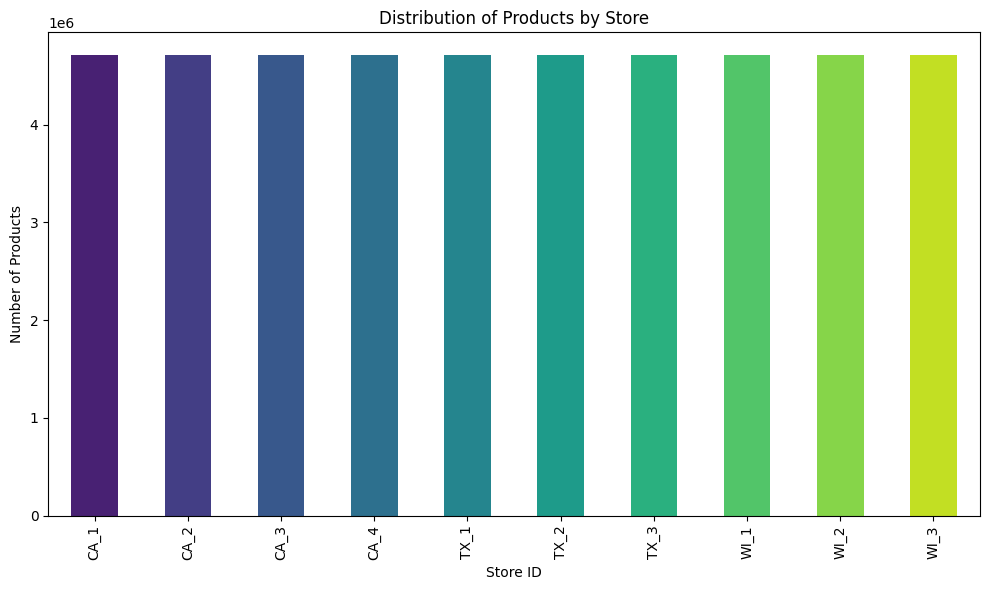

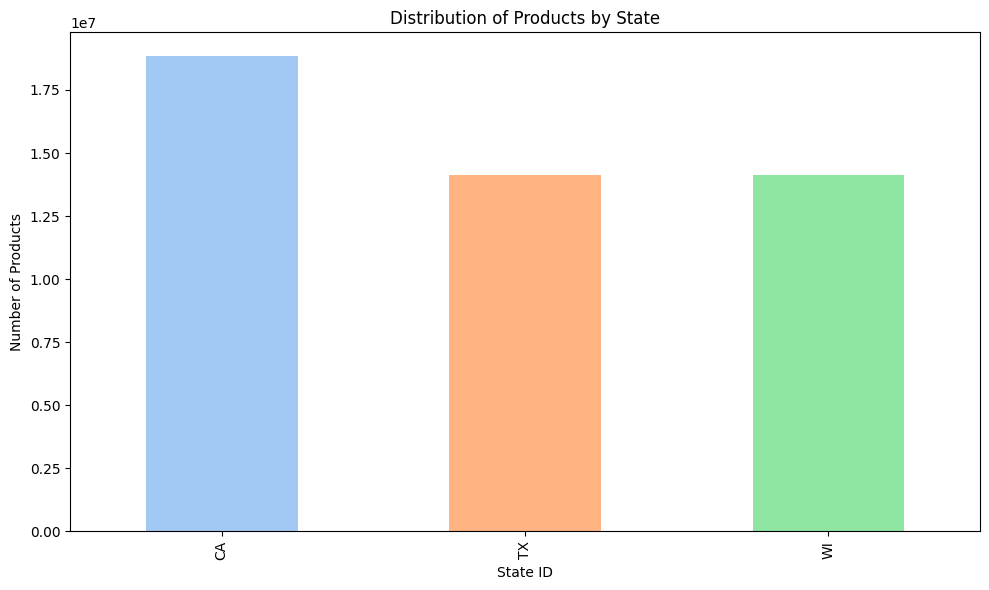

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution by store_id
plt.figure(figsize=(10, 6))
palette_store = sns.color_palette("viridis", n_colors=len(df_train_long['store_id'].unique()))
store_counts = df_train_long['store_id'].value_counts()
store_counts.plot(kind='bar', color=store_counts.index.map(dict(zip(store_counts.index, palette_store))))
plt.title('Distribution of Products by Store')
plt.xlabel('Store ID')
plt.ylabel('Number of Products')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Distribution by state_id
plt.figure(figsize=(10, 6))
palette_state = sns.color_palette("pastel", n_colors=len(df_train_long['state_id'].unique()))
state_counts = df_train_long['state_id'].value_counts()
state_counts.plot(kind='bar', color=state_counts.index.map(dict(zip(state_counts.index, palette_state))))
plt.title('Distribution of Products by State')
plt.xlabel('State ID')
plt.ylabel('Number of Products')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [65]:
store_distribution = df_train_long['store_id'].value_counts().sort_index()

# Convert to a dictionary for easy viewing
products_per_store = store_distribution.to_dict()

# Print the result
for store_id, product_count in products_per_store.items():
    print(f"Store ID {store_id}: {product_count} products")

Store ID CA_1: 4710705 products
Store ID CA_2: 4710705 products
Store ID CA_3: 4710705 products
Store ID CA_4: 4710705 products
Store ID TX_1: 4710705 products
Store ID TX_2: 4710705 products
Store ID TX_3: 4710705 products
Store ID WI_1: 4710705 products
Store ID WI_2: 4710705 products
Store ID WI_3: 4710705 products


In [66]:
# Count unique products per store
unique_products_per_store = df_train_long.groupby('store_id')['item_id'].nunique()

# Convert to a dictionary for easy viewing
products_per_store = unique_products_per_store.to_dict()

# Print the result
for store_id, product_count in products_per_store.items():
    print(f"Store ID {store_id}: {product_count} unique products")

# Some additional insights
print(f"\nTotal unique products across all stores: {df_train_long['item_id'].nunique()}")
print(f"Total unique dates: {df_train_long['date'].nunique()}")
print(f"Average sales entries per store: {len(df_train_long) / len(unique_products_per_store)}")

Store ID CA_1: 3049 unique products
Store ID CA_2: 3049 unique products
Store ID CA_3: 3049 unique products
Store ID CA_4: 3049 unique products
Store ID TX_1: 3049 unique products
Store ID TX_2: 3049 unique products
Store ID TX_3: 3049 unique products
Store ID WI_1: 3049 unique products
Store ID WI_2: 3049 unique products
Store ID WI_3: 3049 unique products

Total unique products across all stores: 3049
Total unique dates: 1541
Average sales entries per store: 4710705.0


#### Converting datetime in to week,month,year and is_weekend

In [257]:
# Convert 'date' to datetime
df_train_long['date'] = pd.to_datetime(df_train_long['date'])
df_test_long['date'] = pd.to_datetime(df_test_long['date'])

# Extract date features
for df in [df_train_long, df_test_long]:
    df['day_of_week'] = df['date'].dt.dayofweek
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

In [259]:
df_train_long.head().T

,0,1,2,3,4
id,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_005_CA_1_evaluation
item_id,HOBBIES_1_001,HOBBIES_1_002,HOBBIES_1_003,HOBBIES_1_004,HOBBIES_1_005
dept_id,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1
cat_id,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES
store_id,CA_1,CA_1,CA_1,CA_1,CA_1
state_id,CA,CA,CA,CA,CA
d,d_1,d_1,d_1,d_1,d_1
sales,0,0,0,0,0
date,2011-01-29 00:00:00,2011-01-29 00:00:00,2011-01-29 00:00:00,2011-01-29 00:00:00,2011-01-29 00:00:00
wm_yr_wk,11101,11101,11101,11101,11101


In [261]:
df_train_long.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47107050 entries, 0 to 47107049
Data columns (total 18 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           object        
 1   item_id      object        
 2   dept_id      object        
 3   cat_id       object        
 4   store_id     object        
 5   state_id     object        
 6   d            object        
 7   sales        int64         
 8   date         datetime64[ns]
 9   wm_yr_wk     int64         
 10  sell_price   float64       
 11  revenue      float64       
 12  event_name   object        
 13  event_type   object        
 14  day_of_week  int64         
 15  month        int64         
 16  year         int64         
 17  is_weekend   int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(9)
memory usage: 6.7+ GB


In [70]:
#Sales by Department and Category
dept_cat_sales = df_train_long.groupby(['dept_id', 'cat_id'])['sales'].sum().reset_index()
print("Top Departments and Categories by Sales:")
print(dept_cat_sales.sort_values('sales', ascending=False).head(10))


Top Departments and Categories by Sales:
       dept_id     cat_id     sales
2      FOODS_3      FOODS  25877025
5  HOUSEHOLD_1  HOUSEHOLD   8636307
1      FOODS_2      FOODS   5749524
3    HOBBIES_1    HOBBIES   4306301
0      FOODS_1      FOODS   3963875
6  HOUSEHOLD_2  HOUSEHOLD   2290913
4    HOBBIES_2    HOBBIES    384218


 Based on the analysis above, we can say that these three superstores sold the most **FOOD** items, which is expected

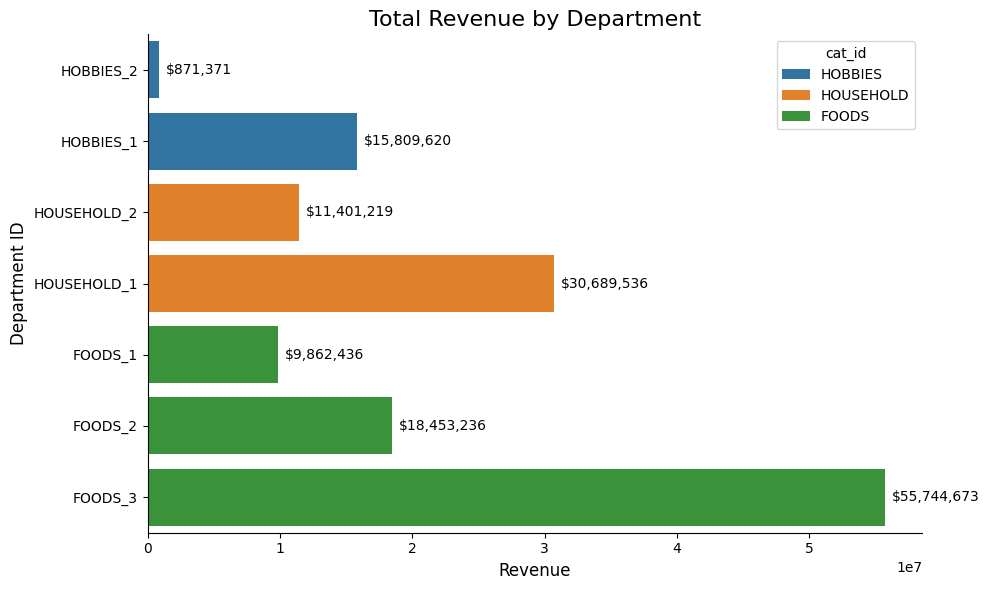

In [71]:
# Calculate total revenue per department
dept_revenue = df_train_long.groupby('dept_id')['revenue'].sum().reset_index()

# Merge with category mapping
category_mapping = df_train_long[['dept_id', 'cat_id']].drop_duplicates()
dept_revenue = pd.merge(dept_revenue, category_mapping, on='dept_id', how='left')

# Calculate total revenue per category for sorting
cat_revenue = dept_revenue.groupby('cat_id')['revenue'].sum().sort_values(ascending=True).index

# Sort departments within each category by revenue
dept_revenue['cat_id'] = pd.Categorical(dept_revenue['cat_id'], categories=cat_revenue, ordered=True)
dept_revenue = dept_revenue.sort_values(['cat_id', 'revenue'], ascending=[True, True])

# Create the plot using default color palette
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=dept_revenue, x='revenue', y='dept_id', 
    hue='cat_id', dodge=False, orient='h'  # Removed palette argument
)

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt='${:,.0f}', padding=5)

# Customize the plot
plt.title('Total Revenue by Department', fontsize=16)
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Department ID', fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()

#### Top Selling Items

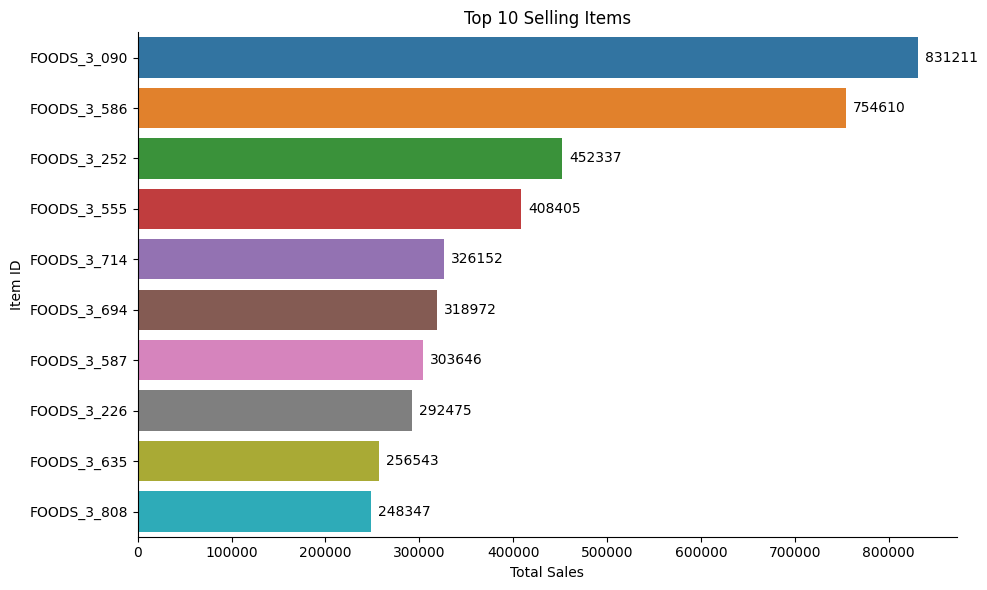

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the total sales for each item
top_items = df_train_long.groupby('item_id')['sales'].sum().nlargest(10).reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='sales', y='item_id', data=top_items, hue='item_id', dodge=False, legend=False)

# Add labels and title
plt.xlabel("Total Sales")
plt.ylabel("Item ID")
plt.title("Top 10 Selling Items")

# Annotate bars with sales values
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                       ha='left', va='center', xytext=(5, 0), textcoords='offset points')

# Remove top and right spines for cleaner look
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

#### Sales by Store and State




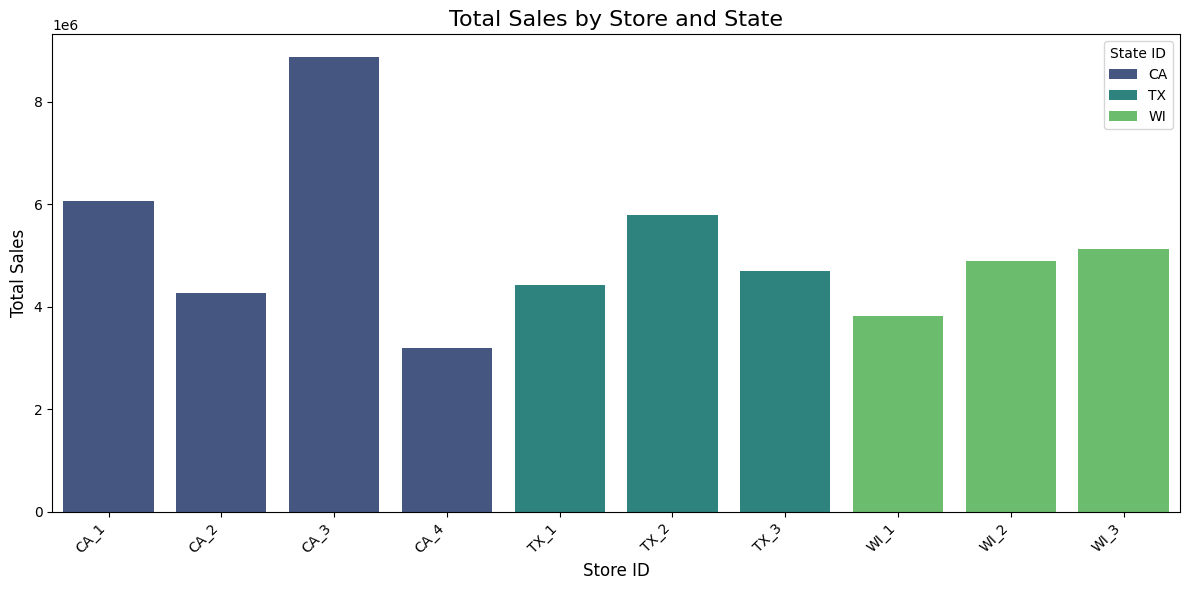


Summary Table (Sales by Store and State):
store_id     CA_1     CA_2     CA_3     CA_4     TX_1     TX_2     TX_3  \
state_id                                                                  
CA        6064780  4264406  8875615  3195086        0        0        0   
TX              0        0        0        0  4428852  5803783  4710203   
WI              0        0        0        0        0        0        0   

store_id     WI_1     WI_2     WI_3  
state_id                             
CA              0        0        0  
TX              0        0        0  
WI        3826487  4900595  5138356  


In [75]:
# Calculate total sales per store and state
store_state_sales = df_train_long.groupby(['store_id', 'state_id'])['sales'].sum().reset_index()

# Create the clustered bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    data=store_state_sales,
    x='store_id',
    y='sales',
    hue='state_id',
    palette='viridis'
)
plt.title('Total Sales by Store and State', fontsize=16)
plt.xlabel('Store ID', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='State ID')
plt.show()


# Create a summary table
sales_summary = store_state_sales.pivot_table(values='sales', index='state_id', columns='store_id', aggfunc='sum', fill_value=0)
print("\nSummary Table (Sales by Store and State):")
print(sales_summary)



#### Based on the event average sales

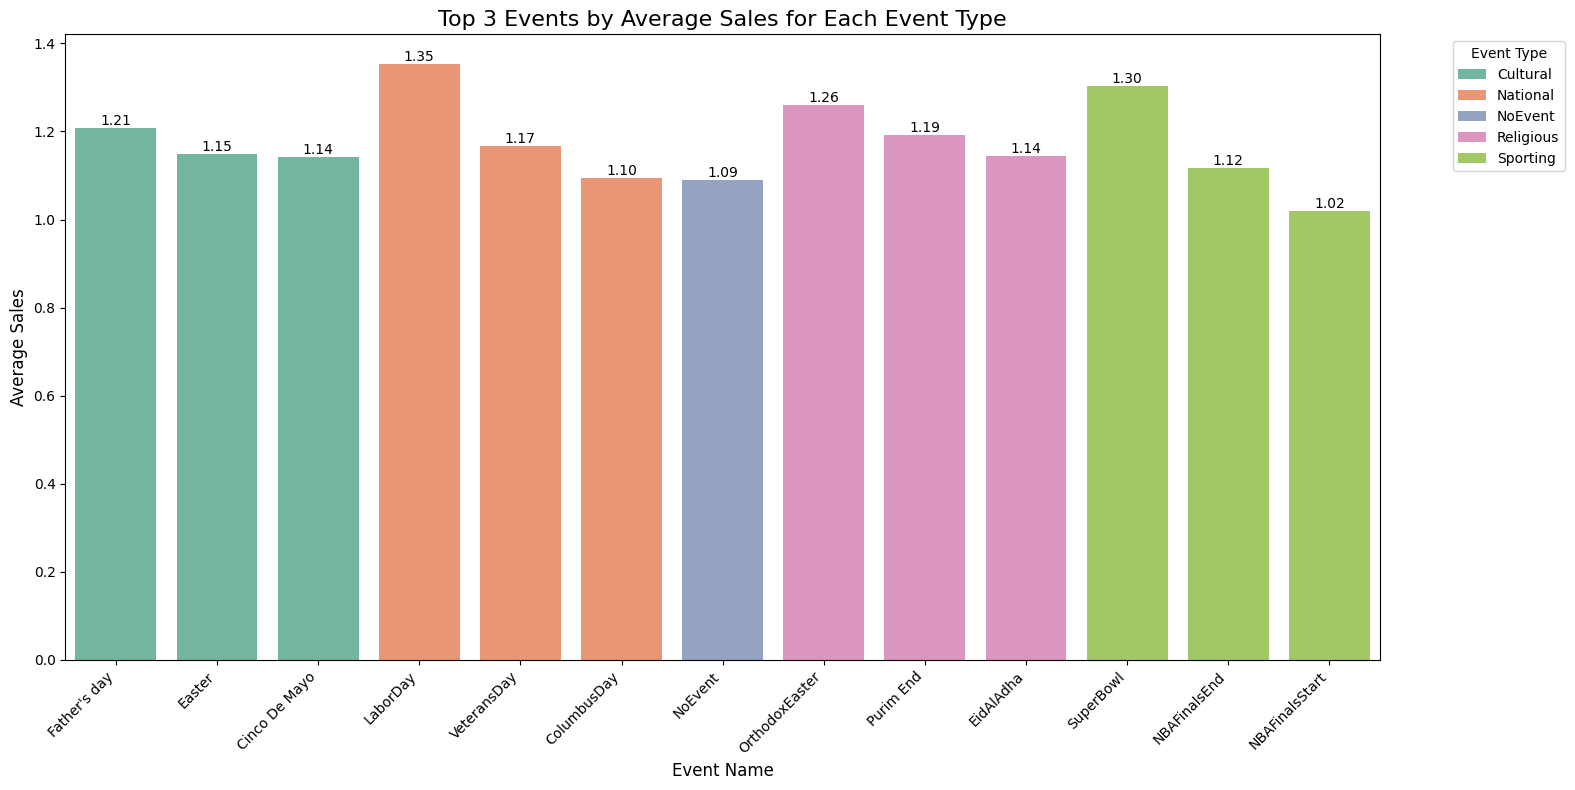

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate average sales per event name and type
event_sales = df_train_long.groupby(['event_name', 'event_type'])['sales'].mean().reset_index()

# Get top 3 events for each type
top_3_events = (event_sales.sort_values('sales', ascending=False)
                           .groupby('event_type')
                           .head(3)
                           .reset_index(drop=True))

# Sort for better visualization
top_3_events_sorted = top_3_events.sort_values(['event_type', 'sales'], ascending=[True, False])

# Create the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(
    data=top_3_events_sorted,
    x='event_name',
    y='sales',
    hue='event_type',
    dodge=False,
    palette='Set2'
)

plt.title('Top 3 Events by Average Sales for Each Event Type', fontsize=16)
plt.xlabel('Event Name', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Event Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate bars with sales values
for i, v in enumerate(top_3_events_sorted['sales']):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()

#### Price vs Sales Analysis

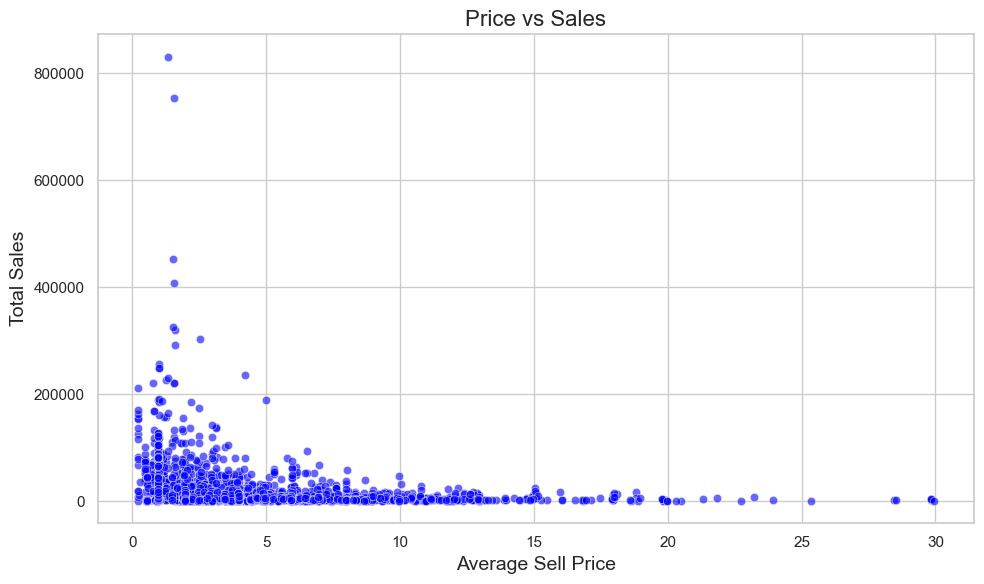

In [251]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Aggregate the data by 'item_id' to compute the average sell price and total sales
price_analysis = df_train_long.groupby('item_id')[['sell_price', 'sales']].agg({
    'sell_price': 'mean',
    'sales': 'sum'
}).reset_index()

sns.set_theme(style="whitegrid")

# scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=price_analysis,
    x='sell_price',
    y='sales',
    color='blue',  
    alpha=0.6      
)

# Enhance the plot with titles and labels
plt.title('Price vs Sales', fontsize=16)
plt.xlabel('Average Sell Price', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)


plt.tight_layout()
plt.show()
 

#### Seasonal Analysis 

In [263]:
monthly_sales = df_train_long.groupby('month')['sales'].mean()
print("\nMonthly Sales Performance:")
print(monthly_sales.sort_values(ascending=False))




Monthly Sales Performance:
month
8     1.141937
9     1.129599
6     1.121383
7     1.114016
10    1.092942
2     1.087826
3     1.081574
4     1.069365
1     1.066627
11    1.060361
12    1.054216
5     1.030708
Name: sales, dtype: float64


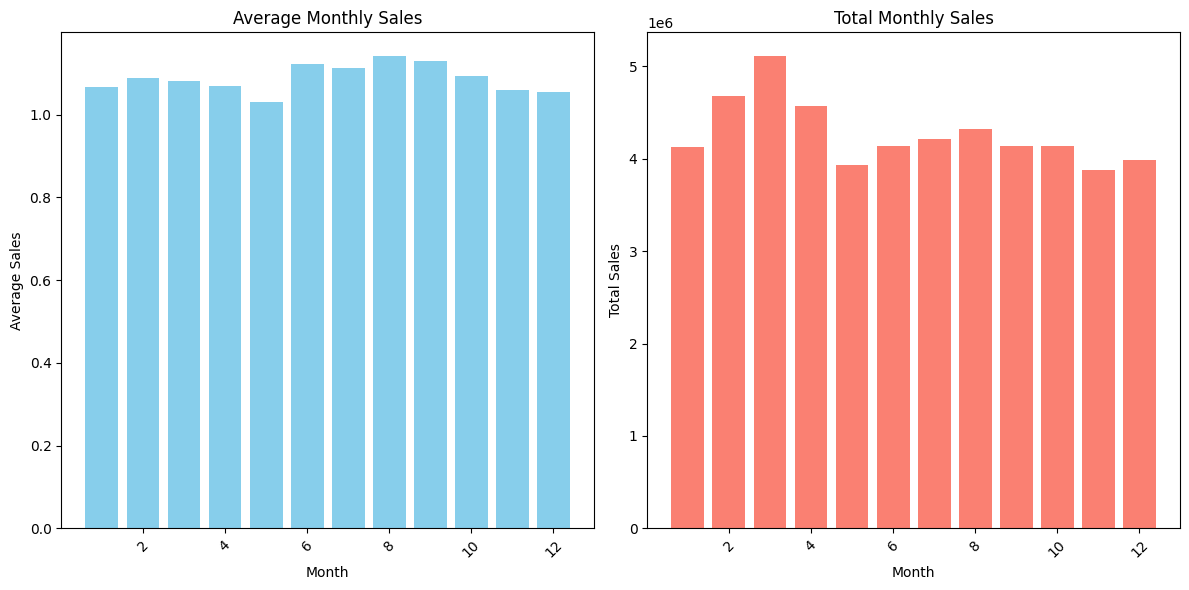


Monthly Sales Performance (Sorted by Total Sales):
    month  average_sales  total_sales
2       3       1.081574      5111464
1       2       1.087826      4676662
3       4       1.069365      4564690
7       8       1.141937      4317389
6       7       1.114016      4211828
5       6       1.121383      4137107
8       9       1.129599      4132976
9      10       1.092942      4132152
0       1       1.066627      4130225
11     12       1.054216      3985736
4       5       1.030708      3928286
10     11       1.060361      3879648


In [85]:
import matplotlib.pyplot as plt

# Group the data by 'month' and calculate the average and total sales
monthly_sales = df_train_long.groupby('month').agg({
    'sales': ['mean', 'sum']
}).reset_index()

# Flatten the MultiIndex columns
monthly_sales.columns = ['month', 'average_sales', 'total_sales']


# Plotting the Average and Total Monthly Sales
plt.figure(figsize=(12, 6))

# Plot Average Sales
plt.subplot(1, 2, 1)
plt.bar(monthly_sales['month'], monthly_sales['average_sales'], color='skyblue')
plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)

# Plot Total Sales
plt.subplot(1, 2, 2)
plt.bar(monthly_sales['month'], monthly_sales['total_sales'], color='salmon')
plt.title('Total Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print the Monthly Sales Performance sorted by Total Sales in descending order
print("\nMonthly Sales Performance (Sorted by Total Sales):")
print(monthly_sales.sort_values(by='total_sales', ascending=False))

#### Day of Week Analysis

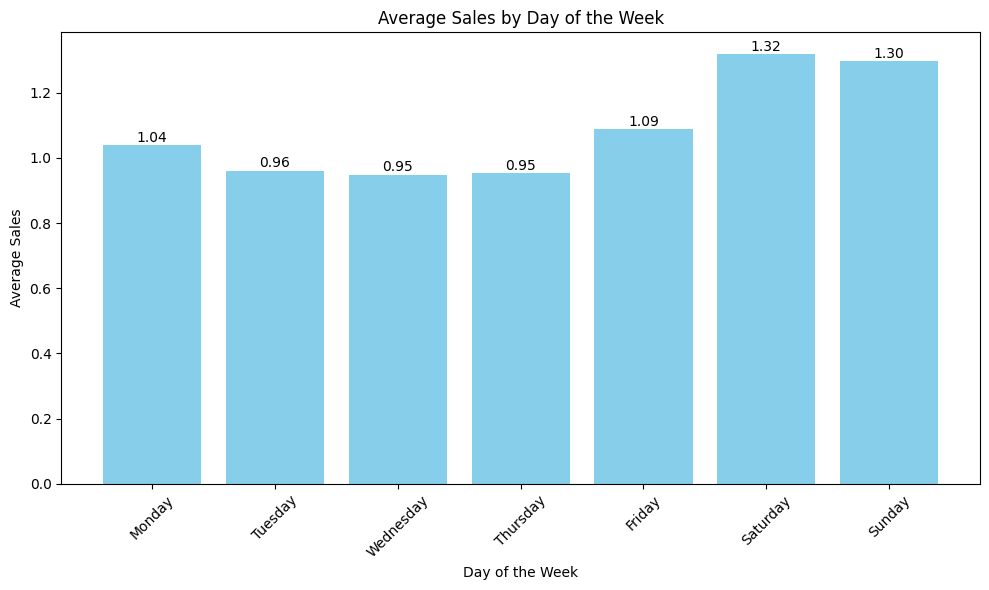


Average Sales by Day of Week:
  day_of_week     sales
5    Saturday  1.319158
6      Sunday  1.297348
4      Friday  1.088407
0      Monday  1.038248
1     Tuesday  0.960636
3    Thursday  0.952224
2   Wednesday  0.948517


In [90]:
day_sales = df_train_long.groupby('day_of_week')['sales'].mean().reset_index()

# day of week start from monday = 0 to sunday =6
day_mapping = {
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
}
day_sales['day_of_week'] = day_sales['day_of_week'].map(day_mapping)

# Ensure the days are ordered correctly
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_sales['day_of_week'] = pd.Categorical(day_sales['day_of_week'], categories=days_order, ordered=True)
day_sales = day_sales.sort_values('day_of_week')

# Plotting the Average Sales by Day of Week
plt.figure(figsize=(10, 6))
plt.bar(day_sales['day_of_week'], day_sales['sales'], color='skyblue')
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding data labels on top of each bar
for index, value in enumerate(day_sales['sales']):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center')

plt.show()

# Print the Average Sales sorted in descending order
print("\nAverage Sales by Day of Week:")
print(day_sales.sort_values(by='sales', ascending=False))



#### Weekend vs Weekday Analysis

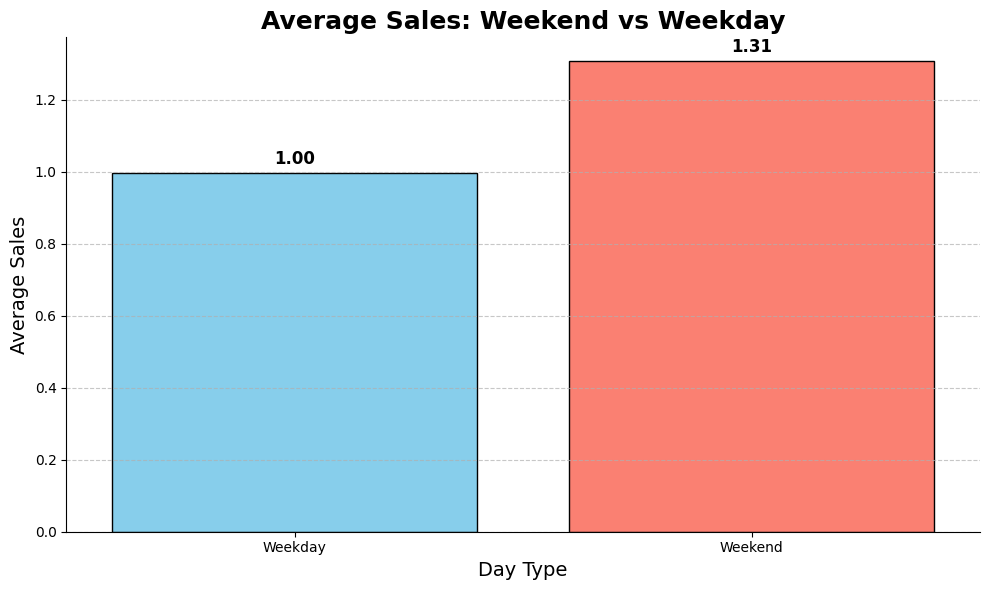

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



#Calculate the average sales for weekends and weekdays
weekend_analysis = df_train_long.groupby('is_weekend')['sales'].mean().reset_index()

# Mapping 'is_weekend' to readable labels
weekend_analysis['Day Type'] = weekend_analysis['is_weekend'].map({0: 'Weekday', 1: 'Weekend'})

#Sort the data for consistent ordering
weekend_analysis = weekend_analysis.sort_values('is_weekend')


plt.figure(figsize=(10, 6))

#Create the barplot 
bar_plot = sns.barplot(
    x='Day Type',
    y='sales',
    data=weekend_analysis,
    edgecolor='black',
    errorbar=None  # Replaces ci=None
)
#color
custom_colors = ['skyblue', 'salmon'] 

# Apply the colors to the bars
for bar, color in zip(bar_plot.patches, custom_colors):
    bar.set_facecolor(color)

#plot with titles and labels
plt.title('Average Sales: Weekend vs Weekday', fontsize=18, weight='bold')
plt.xlabel('Day Type', fontsize=14)
plt.ylabel('Average Sales', fontsize=14)

#Add value labels on top of each bar
for index, row in weekend_analysis.iterrows():
    plt.text(
        index, 
        row['sales'] + (weekend_analysis['sales'].max() * 0.01),  # Slightly above the bar
        f"{row['sales']:.2f}", 
        ha='center', 
        va='bottom', 
        fontsize=12,
        fontweight='bold',
        color='black'
    )


plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.show()

#### Yearly Trend Based On Total Sales

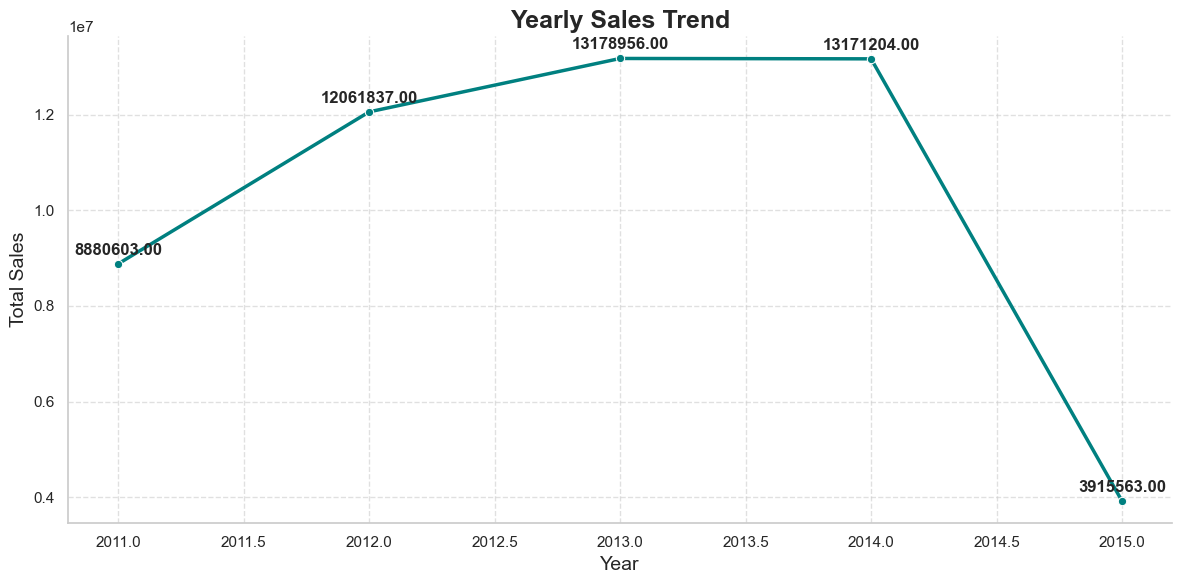

In [265]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the yearly total sales
yearly_sales = df_train_long.groupby('year')['sales'].sum().reset_index()

# Sort the data by year to ensure the plot is in chronological order
yearly_sales = yearly_sales.sort_values('year')

# Initialize the matplotlib figure
plt.figure(figsize=(12, 6))

# Create the line plot using Seaborn
sns.lineplot(
    data=yearly_sales,
    x='year',
    y='sales',
    marker='o',
    color='teal',
    linewidth=2.5
)

# Enhance the plot with titles and labels
plt.title('Yearly Sales Trend', fontsize=18, weight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Annotate each data point with the sales value
for x, y in zip(yearly_sales['year'], yearly_sales['sales']):
    plt.text(x, y + (yearly_sales['sales'].max() * 0.01), f"{y:.2f}", 
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Improve aesthetics by removing top and right spines
sns.despine()


plt.tight_layout()
plt.show()



#### Price Trend Over Time

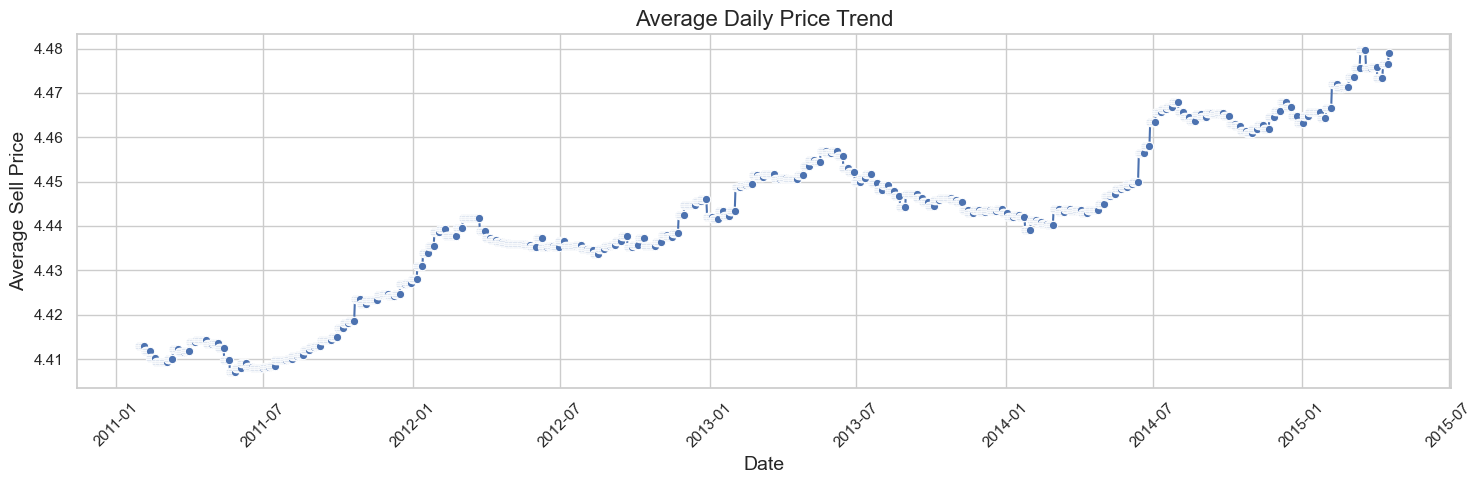

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the average sell price per date
price_trend = df_train_long.groupby('date')['sell_price'].mean().reset_index()

# Set the Seaborn theme for better aesthetics
sns.set_theme(style="whitegrid")

# Create the line plot
plt.figure(figsize=(15, 5))
sns.lineplot(data=price_trend, x='date', y='sell_price', marker='o')

# Enhance the plot with titles and labels
plt.title('Average Daily Price Trend', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average Sell Price', fontsize=14)

# Improve date formatting on the x-axis
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

#### Revenue Analysis


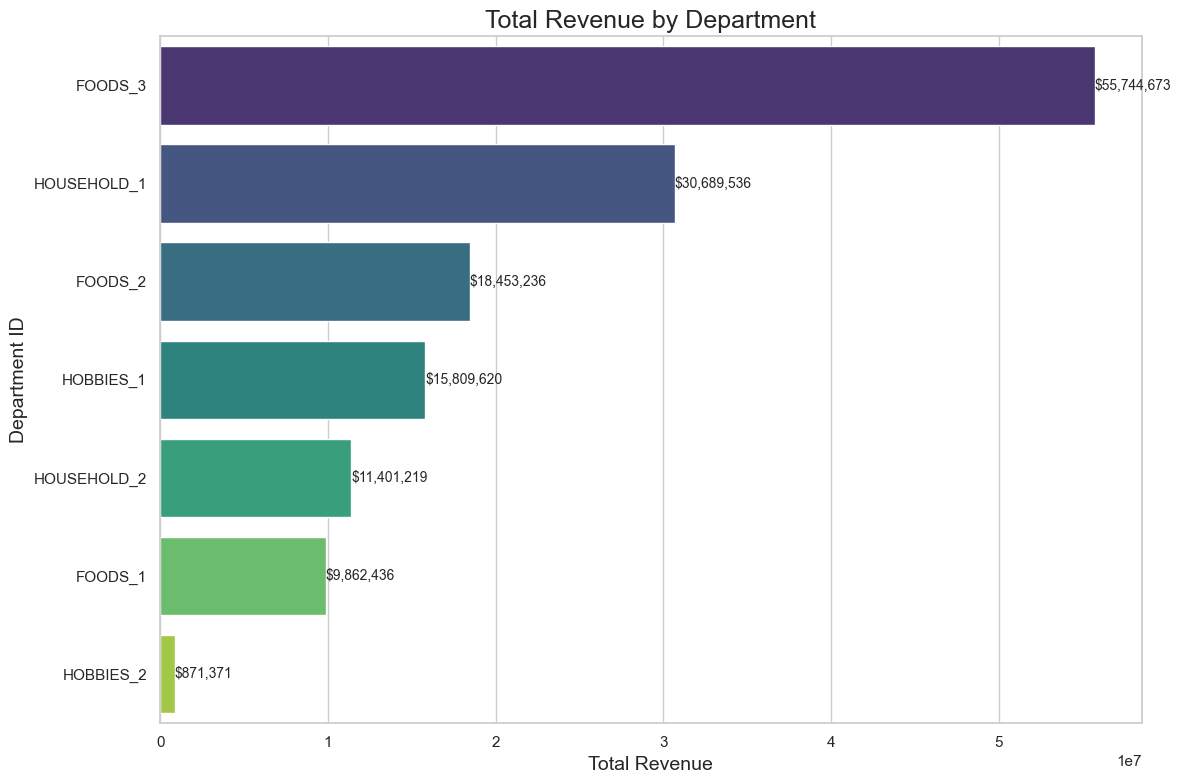

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate total revenue per department
revenue_by_dept = df_train_long.groupby('dept_id')['revenue'].sum().reset_index()

# Sort the departments by revenue in descending order
revenue_by_dept = revenue_by_dept.sort_values(by='revenue', ascending=False)

# Set the Seaborn theme and figure size
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))

# Create the bar plot
ax = sns.barplot(
    data=revenue_by_dept,
    x='revenue',
    y='dept_id',
    hue='dept_id',  # Add hue parameter
    palette='viridis',
    legend=False  # Explicitly set legend to False
)

# Enhance the plot with titles and labels
plt.title('Total Revenue by Department', fontsize=18)
plt.xlabel('Total Revenue', fontsize=14)
plt.ylabel('Department ID', fontsize=14)

# Add value labels to each bar for clarity
for index, value in enumerate(revenue_by_dept['revenue']):
    plt.text(value, index, f'${value:,.0f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

#### Converted CSV file

In [257]:
df_train_long.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,sell_price,revenue,event_name,event_type,day_of_week,month,year,is_weekend
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,8.298076,0.0,NoEvent,NoEvent,5,1,2011,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,3.967459,0.0,NoEvent,NoEvent,5,1,2011,1
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,2.965733,0.0,NoEvent,NoEvent,5,1,2011,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,4.502845,0.0,NoEvent,NoEvent,5,1,2011,1
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,2.880902,0.0,NoEvent,NoEvent,5,1,2011,1


In [259]:
df_test_long.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,sell_price,revenue,event_name,event_type,day_of_week,month,year,is_weekend
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1542,0,2015-04-19,11512,8.26,0.00,NoEvent,NoEvent,6,4,2015,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1542,0,2015-04-19,11512,3.97,0.00,NoEvent,NoEvent,6,4,2015,1
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1542,0,2015-04-19,11512,2.97,0.00,NoEvent,NoEvent,6,4,2015,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1542,4,2015-04-19,11512,4.64,18.56,NoEvent,NoEvent,6,4,2015,1
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1542,3,2015-04-19,11512,2.88,8.64,NoEvent,NoEvent,6,4,2015,1


In [261]:
df_train_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47107050 entries, 0 to 47107049
Data columns (total 18 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           object 
 1   item_id      object 
 2   dept_id      object 
 3   cat_id       object 
 4   store_id     object 
 5   state_id     object 
 6   d            object 
 7   sales        int64  
 8   date         object 
 9   wm_yr_wk     int64  
 10  sell_price   float64
 11  revenue      float64
 12  event_name   object 
 13  event_type   object 
 14  day_of_week  int64  
 15  month        int64  
 16  year         int64  
 17  is_weekend   int64  
dtypes: float64(2), int64(6), object(10)
memory usage: 6.3+ GB


In [263]:
df_train_long.shape

(47107050, 18)

In [265]:
df_test_long.shape

(12196000, 18)

In [267]:
df_test_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12196000 entries, 0 to 12195999
Data columns (total 18 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           object 
 1   item_id      object 
 2   dept_id      object 
 3   cat_id       object 
 4   store_id     object 
 5   state_id     object 
 6   d            object 
 7   sales        int64  
 8   date         object 
 9   wm_yr_wk     int64  
 10  sell_price   float64
 11  revenue      float64
 12  event_name   object 
 13  event_type   object 
 14  day_of_week  int64  
 15  month        int64  
 16  year         int64  
 17  is_weekend   int64  
dtypes: float64(2), int64(6), object(10)
memory usage: 1.6+ GB


In [269]:
features_to_drop = ['id','d','wm_yr_wk','event_name','sales','sell_price'
    ]

# Drop features from df_train_long
df_train_long = df_train_long.drop(columns=features_to_drop)

# Drop features from df_test_long
df_test_long = df_test_long.drop(columns=features_to_drop)

# Print the shapes of the dataframes before and after dropping the features
print(f"Shape of df_train after dropping features: {df_train_long.shape}")
print(f"Shape of df_test after dropping features: {df_test_long.shape}")

#verify the columns were dropped
print("\nRemaining columns in df_train")
print(df_train_long.columns.tolist())

Shape of df_train after dropping features: (47107050, 12)
Shape of df_test after dropping features: (12196000, 12)

Remaining columns in df_train
['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'date', 'revenue', 'event_type', 'day_of_week', 'month', 'year', 'is_weekend']


In [271]:
df_train_long.sample(5).T


,44829642,36187240,17444365,22469800,30050842
item_id,HOBBIES_1_202,FOODS_1_098,HOUSEHOLD_1_481,FOODS_1_110,FOODS_3_724
dept_id,HOBBIES_1,FOODS_1,HOUSEHOLD_1,FOODS_1,FOODS_3
cat_id,HOBBIES,FOODS,HOUSEHOLD,FOODS,FOODS
store_id,CA_4,WI_2,CA_2,WI_3,TX_2
state_id,CA,WI,CA,WI,TX
date,2015-02-03,2014-04-26,2012-08-22,2013-02-02,2013-10-08
revenue,0.0,0.0,0.0,10.68,6.48
event_type,NoEvent,NoEvent,NoEvent,NoEvent,NoEvent
day_of_week,1,5,2,5,1
month,2,4,8,2,10


In [272]:
df_test_long.tail()

,item_id,dept_id,cat_id,store_id,state_id,date,revenue,event_type,day_of_week,month,year,is_weekend
12195995,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,2016-05-22,2.98,NoEvent,6,5,2016,1
12195996,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,2016-05-22,0.00,NoEvent,6,5,2016,1
12195997,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,2016-05-22,7.96,NoEvent,6,5,2016,1
12195998,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,2016-05-22,0.00,NoEvent,6,5,2016,1
12195999,FOODS_3_827,FOODS_3,FOODS,WI_3,WI,2016-05-22,1.00,NoEvent,6,5,2016,1


In [273]:
# Filter the dataset for years 2014 and 2015
filtered_df = df_train_long[df_train_long['year'].isin([2014, 2015])]

# Replace the original training dataset with the filtered one
df_train_long = filtered_df

# Display the size of the new filtered dataset
print(df_train_long.shape)

(14482750, 12)


In [274]:
df_train_long.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14482750 entries, 32624300 to 47107049
Data columns (total 12 columns):
 #   Column       Dtype  
---  ------       -----  
 0   item_id      object 
 1   dept_id      object 
 2   cat_id       object 
 3   store_id     object 
 4   state_id     object 
 5   date         object 
 6   revenue      float64
 7   event_type   object 
 8   day_of_week  int64  
 9   month        int64  
 10  year         int64  
 11  is_weekend   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 1.4+ GB


In [279]:
# Group by item_id and check if all revenue values are 0
zero_revenue_items_train_long = df_train_long.groupby('item_id').apply(lambda x: (x['revenue'] == 0).all())

# Filter to get only the item_ids where all revenue is 0
always_zero_revenue_train_long = zero_revenue_items_train_long[zero_revenue_items_train_long].index.tolist()

# Print the result
print("Item IDs with always 0 revenue in df_train_long:")
print(always_zero_revenue_train_long)
print(f"\nNumber of items with always 0 revenue in df_train_long: {len(always_zero_revenue_train_long)}")

Item IDs with always 0 revenue in df_train_long:
['HOBBIES_1_077', 'HOUSEHOLD_1_512', 'HOUSEHOLD_2_162']

Number of items with always 0 revenue in df_train_long: 3


In [280]:
# Check for lost item_ids
df_train_long_nonzero = df_train_long[df_train_long['revenue'] != 0]

# Now, check for lost item_ids
original_items_train_long = set(df_train_long['item_id'].unique())
nonzero_items_train_long = set(df_train_long_nonzero['item_id'].unique())
lost_items_train_long = original_items_train_long - nonzero_items_train_long

print(f"\nNumber of unique item_ids in original df_train_long: {len(original_items_train_long)}")
print(f"Number of unique item_ids in filtered df_train_long_nonzero: {len(nonzero_items_train_long)}")
print(f"Number of item_ids lost in df_train_long: {len(lost_items_train_long)}")


Number of unique item_ids in original df_train_long: 3049
Number of unique item_ids in filtered df_train_long_nonzero: 3046
Number of item_ids lost in df_train_long: 3


In [281]:
# Group by item_id and check if all revenue values are 0
zero_revenue_items_test_long = df_test_long.groupby('item_id').apply(lambda x: (x['revenue'] == 0).all())

# Filter to get only the item_ids where all revenue is 0
always_zero_revenue_test_long = zero_revenue_items_test_long[zero_revenue_items_test_long].index.tolist()

# Print the result
print("Item IDs with always 0 revenue in df_test_long:")
print(always_zero_revenue_test_long)
print(f"\nNumber of items with always 0 revenue in df_test_long: {len(always_zero_revenue_test_long)}")


Item IDs with always 0 revenue in df_test_long:
[]

Number of items with always 0 revenue in df_test_long: 0


In [285]:
# First, create df_test_long_nonzero 
df_test_long_nonzero = df_test_long[df_test_long['revenue'] != 0]

# Check for lost item_ids
original_items_test_long = set(df_test_long['item_id'].unique())
nonzero_items_test_long = set(df_test_long_nonzero['item_id'].unique())
lost_items_test_long = original_items_test_long - nonzero_items_test_long

print(f"\nNumber of unique item_ids in original df_test_long: {len(original_items_test_long)}")
print(f"Number of unique item_ids in filtered df_test_long_nonzero: {len(nonzero_items_test_long)}")
print(f"Number of item_ids lost in df_test_long: {len(lost_items_test_long)}")



Number of unique item_ids in original df_test_long: 3049
Number of unique item_ids in filtered df_test_long_nonzero: 3049
Number of item_ids lost in df_test_long: 0


In [287]:
# Permanently remove rows with zero revenue
df_train_long = df_train_long[df_train_long['revenue'] != 0]
df_test_long = df_test_long[df_test_long['revenue'] != 0]

print("Final shapes after permanently removing zero revenue rows:")
print("df_train_long shape:", df_train_long.shape)
print("df_test_long shape:", df_test_long.shape)

# Verify no zero revenue rows remain
print("\nVerifying no zero revenue rows remain:")
print("Zero revenue rows in df_train_long:", (df_train_long['revenue'] == 0).sum())
print("Zero revenue rows in df_test_long:", (df_test_long['revenue'] == 0).sum())

Final shapes after permanently removing zero revenue rows:
df_train_long shape: (5148832, 12)
df_test_long shape: (4954566, 12)

Verifying no zero revenue rows remain:
Zero revenue rows in df_train_long: 0
Zero revenue rows in df_test_long: 0


In [289]:
df_test_long.head()

,item_id,dept_id,cat_id,store_id,state_id,date,revenue,event_type,day_of_week,month,year,is_weekend
3,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,2015-04-19,18.56,NoEvent,6,4,2015,1
4,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,2015-04-19,8.64,NoEvent,6,4,2015,1
5,HOBBIES_1_006,HOBBIES_1,HOBBIES,CA_1,CA,2015-04-19,2.00,NoEvent,6,4,2015,1
6,HOBBIES_1_007,HOBBIES_1,HOBBIES,CA_1,CA,2015-04-19,7.88,NoEvent,6,4,2015,1
7,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,2015-04-19,1.92,NoEvent,6,4,2015,1


In [293]:
df_train_long.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5148832 entries, 32624300 to 47107049
Data columns (total 12 columns):
 #   Column       Dtype  
---  ------       -----  
 0   item_id      object 
 1   dept_id      object 
 2   cat_id       object 
 3   store_id     object 
 4   state_id     object 
 5   date         object 
 6   revenue      float64
 7   event_type   object 
 8   day_of_week  int64  
 9   month        int64  
 10  year         int64  
 11  is_weekend   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 510.7+ MB


### Loaded train and test dataset with processed dataset.

In [310]:
df_train_long = pd.read_csv('../../data/processed/df_train_long.csv')
df_test_long = pd.read_csv('../../data/processed/df_test_long.csv')

In [312]:
import pandas as pd
import numpy as np

def optimize_dtypes(df, exclude_cols=[]):
    """
    Optimizes the data types of a DataFrame to reduce memory usage.
    Columns in exclude_cols are not converted to 'category'.
    """
    for col in df.columns:
        if col in exclude_cols:
            continue  # Skip columns that should not be optimized
        
        col_type = df[col].dtype
        
        if col_type == 'int64':
            if df[col].min() >= np.iinfo(np.int8).min and df[col].max() <= np.iinfo(np.int8).max:
                df[col] = df[col].astype(np.int8)
            elif df[col].min() >= np.iinfo(np.int16).min and df[col].max() <= np.iinfo(np.int16).max:
                df[col] = df[col].astype(np.int16)
            elif df[col].min() >= np.iinfo(np.int32).min and df[col].max() <= np.iinfo(np.int32).max:
                df[col] = df[col].astype(np.int32)
        
        elif col_type == 'float64':
            df[col] = df[col].astype(np.float32)
        
        elif col_type == 'object':
            num_unique_values = df[col].nunique()
            num_total_values = len(df[col])
            # Convert to 'category' if unique values are less than 50% of total values
            if num_unique_values / num_total_values < 0.5:
                df[col] = df[col].astype('category')
    
    return df

# Apply optimization to both datasets, excluding 'date'
df_train_long = optimize_dtypes(df_train_long, exclude_cols=['date'])
df_test_long = optimize_dtypes(df_test_long, exclude_cols=['date'])

# Verify data types
print("Training Data Types After Optimization:")
print(df_train_long.dtypes)

print("\nTesting Data Types After Optimization:")
print(df_test_long.dtypes)

Training Data Types After Optimization:
item_id        category
dept_id        category
cat_id         category
store_id       category
state_id       category
date             object
revenue         float32
event_type     category
day_of_week        int8
month              int8
year              int16
is_weekend         int8
dtype: object

Testing Data Types After Optimization:
item_id        category
dept_id        category
cat_id         category
store_id       category
state_id       category
date             object
revenue         float32
event_type     category
day_of_week        int8
month              int8
year              int16
is_weekend         int8
dtype: object


In [314]:
# Convert 'date' to datetime
df_train_long['date'] = pd.to_datetime(df_train_long['date'])
df_test_long['date'] = pd.to_datetime(df_test_long['date'])

In [316]:
# Compute mean revenue for each item_id from the training data
item_id_mean = df_train_long.groupby('item_id')['revenue'].mean()

# Map the mean revenue to the training data
df_train_long['item_id_encoded'] = df_train_long['item_id'].map(item_id_mean)

# Compute global mean revenue from the training set for handling unseen item_ids in test set
global_mean = df_train_long['revenue'].mean()

# Map the mean revenue to the testing data, filling NaNs (unseen item_ids) with global mean
df_test_long['item_id_encoded'] = df_test_long['item_id'].map(item_id_mean).fillna(global_mean)

# Convert 'item_id_encoded' to float32 to save memory
df_train_long['item_id_encoded'] = df_train_long['item_id_encoded'].astype(np.float32)
df_test_long['item_id_encoded'] = df_test_long['item_id_encoded'].astype(np.float32)

# Verify the encoding
print("\nTraining Data Sample After Target Encoding:")
print(df_train_long[['item_id', 'revenue', 'item_id_encoded']].head())

print("\nTesting Data Sample After Target Encoding:")
print(df_test_long[['item_id', 'revenue', 'item_id_encoded']].head())


Training Data Sample After Target Encoding:
         item_id  revenue  item_id_encoded
0  HOBBIES_1_001     8.26        11.197340
1  HOBBIES_1_004     9.28        16.136732
2  HOBBIES_1_005     3.08         4.614056
3  HOBBIES_1_008     1.38         3.033245
4  HOBBIES_1_010     8.91         4.240199

Testing Data Sample After Target Encoding:
         item_id    revenue  item_id_encoded
0  HOBBIES_1_004  18.559999        16.136732
1  HOBBIES_1_005   8.640000         4.614056
2  HOBBIES_1_006   2.000000         2.290373
3  HOBBIES_1_007   7.880000         9.097492
4  HOBBIES_1_008   1.920000         3.033245


In [324]:
# Save the mean encoding mapping based on training data
joblib.dump(item_id_mean, 'item_id_mean.joblib')


['item_id_mean.joblib']

In [318]:
# Define sampling parameters
sampling_fraction_test = 0.1  # Sample 10% of the test data
sampling_fraction_train = 0.4  # Sample 40% of the training data to achieve a 4:1 ratio

min_samples = 5         

def stratified_sample(df, group_col, frac, min_samples):
    """
    Performs stratified sampling on the DataFrame based on group_col.
    Ensures each group has at least min_samples after sampling.
    """
    sampled_df = df.groupby(group_col, group_keys=False).apply(
        lambda x: x.sample(frac=frac, random_state=42) if len(x) * frac >= min_samples else x.sample(n=min_samples, replace=True, random_state=42)
    )
    return sampled_df

# Apply stratified sampling to test dataset first
df_test_reduced = stratified_sample(df_test_long, 'item_id', sampling_fraction_test, min_samples)

# Then, sample the training set to be 4 times the test set
desired_train_size = df_test_reduced.shape[0] * 4
current_train_size = df_train_long.shape[0]

# Calculate the required sampling fraction for the training set
sampling_fraction_train = desired_train_size / current_train_size

# Ensure that the sampling fraction does not exceed 1.0
sampling_fraction_train = min(sampling_fraction_train, 1.0)

df_train_reduced = stratified_sample(df_train_long, 'item_id', sampling_fraction_train, min_samples)

print(f"\nReduced Training Set Shape: {df_train_reduced.shape}")
print(f"Reduced Testing Set Shape: {df_test_reduced.shape}")

# Verify that all item_ids are present in both sets
missing_train_item_ids = set(df_train_long['item_id'].unique()) - set(df_train_reduced['item_id'].unique())
missing_test_item_ids = set(df_test_long['item_id'].unique()) - set(df_test_reduced['item_id'].unique())

print(f"\nMissing item_ids in Reduced Training Set: {len(missing_train_item_ids)}")
print(f"Missing item_ids in Reduced Testing Set: {len(missing_test_item_ids)}")


Reduced Training Set Shape: (1981759, 13)
Reduced Testing Set Shape: (495442, 13)

Missing item_ids in Reduced Training Set: 0
Missing item_ids in Reduced Testing Set: 0


In [320]:
# Sort the reduced training data by date to maintain temporal order
df_train_reduced = df_train_reduced.sort_values('date')

# Define the cutoff date for splitting (75% for training, 25% for validation)
unique_dates = df_train_reduced['date'].unique()
unique_dates_sorted = np.sort(unique_dates)
cutoff_index = int(len(unique_dates_sorted) * 0.75)  # 75% for training
cutoff_date = unique_dates_sorted[cutoff_index]

print(f"\nCutoff Date for Train-Validation Split: {cutoff_date}")

# Split the data
train_set = df_train_reduced[df_train_reduced['date'] < cutoff_date]
validation_set = df_train_reduced[df_train_reduced['date'] >= cutoff_date]

print(f"Training Set Shape: {train_set.shape}")
print(f"Validation Set Shape: {validation_set.shape}")

# Verify that all item_ids are present in both sets
train_item_ids = set(train_set['item_id'].unique())
validation_item_ids = set(validation_set['item_id'].unique())

missing_in_validation = train_item_ids - validation_item_ids
missing_in_train = validation_item_ids - train_item_ids

print(f"\nNumber of item_ids missing in validation set: {len(missing_in_validation)}")
print(f"Number of item_ids missing in training set: {len(missing_in_train)}")


Cutoff Date for Train-Validation Split: 2014-12-21T00:00:00.000000000
Training Set Shape: (1474597, 13)
Validation Set Shape: (507162, 13)

Number of item_ids missing in validation set: 9
Number of item_ids missing in training set: 42


In [322]:
# Handle missing item_ids in validation set
if len(missing_in_validation) > 0:
    # List of missing item_ids
    missing_item_ids = list(missing_in_validation)
    
    for item_id in missing_item_ids:
        # Select a few recent records of the missing item_id from training set
        item_records = train_set[train_set['item_id'] == item_id].sort_values('date', ascending=False)
        n_samples = min(5, len(item_records))  
        samples_to_move = item_records.head(n_samples)
        
        # Append these samples to the validation set using pd.concat to avoid FutureWarning
        validation_set = pd.concat([validation_set, samples_to_move], ignore_index=True)
        
        # Remove these samples from the training set
        train_set = train_set.drop(samples_to_move.index)
    
    # verifying the presence of all item_ids in both sets
    train_item_ids = set(train_set['item_id'].unique())
    validation_item_ids = set(validation_set['item_id'].unique())
    
    missing_in_validation = train_item_ids - validation_item_ids
    missing_in_train = validation_item_ids - train_item_ids
    
    print(f"After Adjustment - Missing in Validation: {len(missing_in_validation)}")
    print(f"After Adjustment - Missing in Training: {len(missing_in_train)}")

print(f"Final Training Set Shape: {train_set.shape}")
print(f"Final Validation Set Shape: {validation_set.shape}")

After Adjustment - Missing in Validation: 0
After Adjustment - Missing in Training: 42
Final Training Set Shape: (1474552, 13)
Final Validation Set Shape: (507207, 13)


In [401]:
def stratified_sample_split(df, group_col, train_frac, val_frac, min_train=1, min_val=1):
    """
    Splits the DataFrame into training and validation sets with stratification.
    Ensures each group has at least min_train in training and min_val in validation.
    """
    train_list = []
    val_list = []
    
    for name, group in df.groupby(group_col):
        n_train = max(int(len(group) * train_frac), min_train)
        n_val = max(int(len(group) * val_frac), min_val)
        
        # Adjust if total exceeds group size
        if n_train + n_val > len(group):
            n_val = len(group) - n_train
        
        # Sample training and validation
        train_samples = group.sample(n=n_train, random_state=42)
        val_samples = group.drop(train_samples.index).sample(n=n_val, random_state=42)
        
        train_list.append(train_samples)
        val_list.append(val_samples)
    
    train_df = pd.concat(train_list).reset_index(drop=True)
    val_df = pd.concat(val_list).reset_index(drop=True)
    
    return train_df, val_df

# Define train-validation split fractions
train_frac = 0.75
val_frac = 0.25

# Perform the split using the custom function
train_set, validation_set = stratified_sample_split(df_train_reduced, 'item_id', train_frac, val_frac, min_train=1, min_val=1)

print(f"\nFinal Training Set Shape: {train_set.shape}")
print(f"Final Validation Set Shape: {validation_set.shape}")

# Verify that all item_ids are present in both sets
train_item_ids = set(train_set['item_id'].unique())
validation_item_ids = set(validation_set['item_id'].unique())

missing_in_validation = train_item_ids - validation_item_ids
missing_in_train = validation_item_ids - train_item_ids

print(f"Number of item_ids missing in validation set: {len(missing_in_validation)}")
print(f"Number of item_ids missing in training set: {len(missing_in_train)}")


Final Training Set Shape: (1485173, 13)
Final Validation Set Shape: (494293, 13)
Number of item_ids missing in validation set: 0
Number of item_ids missing in training set: 0


In [403]:
print("\nFinal Training Set Data Types:")
print(train_set.dtypes)

print("\nFinal Validation Set Data Types:")
print(validation_set.dtypes)


print("\nTraining Set Revenue Statistics:")
print(train_set['revenue'].describe())

print("\nValidation Set Revenue Statistics:")
print(validation_set['revenue'].describe())


Final Training Set Data Types:
item_id                  category
dept_id                  category
cat_id                   category
store_id                 category
state_id                 category
date               datetime64[ns]
revenue                   float32
event_type               category
day_of_week                  int8
month                        int8
year                        int16
is_weekend                   int8
item_id_encoded           float32
dtype: object

Final Validation Set Data Types:
item_id                  category
dept_id                  category
cat_id                   category
store_id                 category
state_id                 category
date               datetime64[ns]
revenue                   float32
event_type               category
day_of_week                  int8
month                        int8
year                        int16
is_weekend                   int8
item_id_encoded           float32
dtype: object

Training Set Revenue 

In [407]:
# Save the processed datasets
train_set.to_csv('df_train_reduced.csv', index=False)
validation_set.to_csv('df_validation.csv', index=False)
df_test_reduced.to_csv('df_test_reduced.csv', index=False)

print("\nProcessed datasets saved successfully.")


Processed datasets saved successfully.


In [282]:
df_train = pd.read_csv('../../data/processed/df_train_reduced.csv')
df_val = pd.read_csv('../../data/processed/df_validation.csv')
df_test = pd.read_csv('../../data/processed/df_test_reduced.csv')

In [283]:
df_train.head()

,item_id,dept_id,cat_id,store_id,state_id,date,revenue,event_type,day_of_week,month,year,is_weekend,item_id_encoded
0,FOODS_1_001,FOODS_1,FOODS,WI_1,WI,2014-10-02,2.24,NoEvent,3,10,2014,0,4.053706
1,FOODS_1_001,FOODS_1,FOODS,WI_1,WI,2014-04-18,6.72,NoEvent,4,4,2014,0,4.053706
2,FOODS_1_001,FOODS_1,FOODS,CA_2,CA,2014-10-14,2.24,NoEvent,1,10,2014,0,4.053706
3,FOODS_1_001,FOODS_1,FOODS,TX_2,TX,2014-06-22,6.72,NoEvent,6,6,2014,1,4.053706
4,FOODS_1_001,FOODS_1,FOODS,TX_2,TX,2014-05-12,6.72,NoEvent,0,5,2014,0,4.053706


In [286]:
features_to_drop = ['item_id', 'date']

# Drop features from df_train
df_train = df_train.drop(columns=features_to_drop)

# Drop features from df_val
df_val = df_val.drop(columns=features_to_drop)

# Drop features from df_test
df_test = df_test.drop(columns=features_to_drop)

# Print the shapes of the dataframes after dropping the features
print(f"Shape of df_train after dropping features: {df_train.shape}")
print(f"Shape of df_val after dropping features: {df_val.shape}")
print(f"Shape of df_test after dropping features: {df_test.shape}")

# Verify the columns were dropped
print("\nRemaining columns in df_train:")
print(df_train.columns.tolist())
print("\nRemaining columns in df_val:")
print(df_val.columns.tolist())
print("\nRemaining columns in df_test:")
print(df_test.columns.tolist())

Shape of df_train after dropping features: (1485173, 11)
Shape of df_val after dropping features: (494293, 11)
Shape of df_test after dropping features: (495442, 11)

Remaining columns in df_train:
['dept_id', 'cat_id', 'store_id', 'state_id', 'revenue', 'event_type', 'day_of_week', 'month', 'year', 'is_weekend', 'item_id_encoded']

Remaining columns in df_val:
['dept_id', 'cat_id', 'store_id', 'state_id', 'revenue', 'event_type', 'day_of_week', 'month', 'year', 'is_weekend', 'item_id_encoded']

Remaining columns in df_test:
['dept_id', 'cat_id', 'store_id', 'state_id', 'revenue', 'event_type', 'day_of_week', 'month', 'year', 'is_weekend', 'item_id_encoded']


In [288]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485173 entries, 0 to 1485172
Data columns (total 11 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   dept_id          1485173 non-null  object 
 1   cat_id           1485173 non-null  object 
 2   store_id         1485173 non-null  object 
 3   state_id         1485173 non-null  object 
 4   revenue          1485173 non-null  float64
 5   event_type       1485173 non-null  object 
 6   day_of_week      1485173 non-null  int64  
 7   month            1485173 non-null  int64  
 8   year             1485173 non-null  int64  
 9   is_weekend       1485173 non-null  int64  
 10  item_id_encoded  1485173 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 124.6+ MB


In [290]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495442 entries, 0 to 495441
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   dept_id          495442 non-null  object 
 1   cat_id           495442 non-null  object 
 2   store_id         495442 non-null  object 
 3   state_id         495442 non-null  object 
 4   revenue          495442 non-null  float64
 5   event_type       495442 non-null  object 
 6   day_of_week      495442 non-null  int64  
 7   month            495442 non-null  int64  
 8   year             495442 non-null  int64  
 9   is_weekend       495442 non-null  int64  
 10  item_id_encoded  495442 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 41.6+ MB


In [292]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import joblib

In [294]:
categorical_features = [
    'dept_id', 
    'cat_id', 
    'store_id', 
    'state_id', 
    'event_type', 
    'day_of_week', 
    'month', 
    'year'
]

In [296]:
from sklearn.preprocessing import OrdinalEncoder
import joblib

# Initialize OrdinalEncoder with parameters to handle unseen categories
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit the encoder on the training data
ordinal_encoder.fit(df_train[categorical_features])

OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [ ]:
# Saving the fitted encoder 
joblib.dump(ordinal_encoder, 'ordinal_encoder.joblib')

In [298]:
# Create copies to preserve original data
df_train_encoded = df_train.copy()
df_val_encoded = df_val.copy()
df_test_encoded = df_test.copy()

# Transform the datasets
df_train_encoded[categorical_features] = ordinal_encoder.transform(df_train[categorical_features])
df_val_encoded[categorical_features] = ordinal_encoder.transform(df_val[categorical_features])
df_test_encoded[categorical_features] = ordinal_encoder.transform(df_test[categorical_features])

# Verify the transformation
print("Encoded Training Set Sample:")
print(df_train_encoded.head())

print("\nEncoded Validation Set Sample:")
print(df_val_encoded.head())

print("\nEncoded Test Set Sample:")
print(df_test_encoded.head())

Encoded Training Set Sample:
   dept_id  cat_id  store_id  state_id  revenue  event_type  day_of_week  \
0      0.0     0.0       7.0       2.0     2.24         2.0          3.0   
1      0.0     0.0       7.0       2.0     6.72         2.0          4.0   
2      0.0     0.0       1.0       0.0     2.24         2.0          1.0   
3      0.0     0.0       5.0       1.0     6.72         2.0          6.0   
4      0.0     0.0       5.0       1.0     6.72         2.0          0.0   

   month  year  is_weekend  item_id_encoded  
0    9.0   0.0           0         4.053706  
1    3.0   0.0           0         4.053706  
2    9.0   0.0           0         4.053706  
3    5.0   0.0           1         4.053706  
4    4.0   0.0           0         4.053706  

Encoded Validation Set Sample:
   dept_id  cat_id  store_id  state_id  revenue  event_type  day_of_week  \
0      0.0     0.0       8.0       2.0     2.24         2.0          3.0   
1      0.0     0.0       2.0       0.0    11.20       

In [300]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data's numerical feature
scaler.fit(df_train_encoded[['item_id_encoded']])

# Transform the numerical feature
df_train_encoded['item_id_encoded'] = scaler.transform(df_train_encoded[['item_id_encoded']])
df_val_encoded['item_id_encoded'] = scaler.transform(df_val_encoded[['item_id_encoded']])
df_test_encoded['item_id_encoded'] = scaler.transform(df_test_encoded[['item_id_encoded']])



In [ ]:
# Save the scaler for future use
joblib.dump(scaler, 'scaler.joblib')



In [326]:
# Verify scaling
print("Scaled Training Set Sample:")
print(df_train_encoded.head())

Scaled Training Set Sample:
   dept_id  cat_id  store_id  state_id  revenue  event_type  day_of_week  \
0      0.0     0.0       7.0       2.0     2.24         2.0          3.0   
1      0.0     0.0       7.0       2.0     6.72         2.0          4.0   
2      0.0     0.0       1.0       0.0     2.24         2.0          1.0   
3      0.0     0.0       5.0       1.0     6.72         2.0          6.0   
4      0.0     0.0       5.0       1.0     6.72         2.0          0.0   

   month  year  is_weekend  item_id_encoded  
0    9.0   0.0           0        -0.607368  
1    3.0   0.0           0        -0.607368  
2    9.0   0.0           0        -0.607368  
3    5.0   0.0           1        -0.607368  
4    4.0   0.0           0        -0.607368  


In [302]:
# Define features and target
features = [
    'dept_id', 
    'cat_id', 
    'store_id', 
    'state_id', 
    'event_type', 
    'day_of_week', 
    'month', 
    'year', 
    'is_weekend', 
    'item_id_encoded'
]
target = 'revenue'

# Prepare training, validation, and test sets
X_train = df_train_encoded[features]
y_train = df_train_encoded[target]

X_val = df_val_encoded[features]
y_val = df_val_encoded[target]

X_test = df_test_encoded[features]
y_test = df_test_encoded[target]  

In [304]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Linear Regression model
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

LinearRegression()

In [25]:
# Predict on the validation set
y_pred_val_lr = lr.predict(X_val)

# Evaluate the model
mae_lr = mean_absolute_error(y_val, y_pred_val_lr)
mse_lr = mean_squared_error(y_val, y_pred_val_lr)
rmse_lr = mse_lr ** 0.5

print("Baseline Model (Linear Regression) Performance on Validation Set:")
print(f"MAE: {mae_lr:.2f}")
print(f"MSE: {mse_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")

Baseline Model (Linear Regression) Performance on Validation Set:
MAE: 5.08
MSE: 109.24
RMSE: 10.45


In [28]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [31]:
# Initialize Random Forest Regressor with optimized parameters
rf = RandomForestRegressor(
    n_estimators=100,          # Number of trees in the forest
    max_depth=20,              # Maximum depth of the tree
    min_samples_split=10,      # Minimum number of samples required to split an internal node
    min_samples_leaf=5,        # Minimum number of samples required to be at a leaf node
    random_state=42,
    n_jobs=-1                   # Utilize all available cores
)

# Train the model
rf.fit(X_train, y_train)

# Predict on the validation set
y_pred_val_rf = rf.predict(X_val)

# Evaluate the model
mae_rf = mean_absolute_error(y_val, y_pred_val_rf)
mse_rf = mean_squared_error(y_val, y_pred_val_rf)
rmse_rf = mse_rf ** 0.5

print("Advanced Model (Random Forest) Performance on Validation Set:")
print(f"MAE: {mae_rf:.2f}")
print(f"MSE: {mse_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")

Advanced Model (Random Forest) Performance on Validation Set:
MAE: 4.26
MSE: 63.74
RMSE: 7.98


In [35]:
from sklearn.model_selection import GridSearchCV

# Define the expanded parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [15, 20, 25],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 5]
}

# Initialize Grid Search
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid=param_grid,
    cv=3,  
    n_jobs=-1,
    verbose=2,
    scoring='neg_mean_squared_error'
)

# Perform Grid Search
print("Starting Grid Search...")
grid_search.fit(X_train, y_train)
print("Grid Search completed.")

# Best parameters
print(f"Best Parameters: {grid_search.best_params_}")


Starting Grid Search...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time= 3.2min
[CV] END max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time= 3.1min
[CV] END max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time= 6.1min
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time= 3.4min


/Users/sadmansakib/Library/Caches/pypoetry/virtualenvs/adv-mla-at2-exp-a5DNyDuM-py3.11/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time= 3.2min
[CV] END max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time= 3.1min
[CV] END max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time= 6.0min
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time= 3.6min
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time= 3.2min
[CV] END max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time= 3.0min
[CV] END max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time= 3.0min
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time= 3.7min
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time= 6.6min
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=100; tota

In [36]:
# Best estimator
best_rf = grid_search.best_estimator_

# Predict on validation set
y_pred_val_best_rf = best_rf.predict(X_val)

# Evaluate the best model
mae_best_rf = mean_absolute_error(y_val, y_pred_val_best_rf)
mse_best_rf = mean_squared_error(y_val, y_pred_val_best_rf)
rmse_best_rf = np.sqrt(mse_best_rf)


print("\nBest Random Forest Model Performance on Validation Set:")
print(f"MAE: {mae_best_rf:.2f}")
print(f"MSE: {mse_best_rf:.2f}")
print(f"RMSE: {rmse_best_rf:.2f}")




Best Random Forest Model Performance on Validation Set:
MAE: 4.35
MSE: 65.75
RMSE: 8.11


In [37]:
# Save the Random Forest model
joblib.dump(best_rf, 'random_forest_model.joblib')

print("Random Forest model saved successfully.")

Random Forest model saved successfully.
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time= 6.1min
[CV] END max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time= 5.8min
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time= 6.9min
[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time= 3.4min
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time= 3.8min
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time= 7.7min
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time= 6.2min
[CV] END max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time= 3.1min
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time= 7.2min
[CV] END max_depth=20, min_samples_leaf=5, min_

In [274]:
import joblib

# Load the trained Random Forest model
rf_model = joblib.load('random_forest_model.joblib')

print("Random Forest model loaded successfully.")

Random Forest model loaded successfully.


In [306]:
# Make predictions on the testing set
y_pred_test_rf = rf_model.predict(X_test)

print("Predictions on the testing set completed successfully.")

Predictions on the testing set completed successfully.


In [308]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate performance metrics
mae_test_rf = mean_absolute_error(y_test, y_pred_test_rf)
mse_test_rf = mean_squared_error(y_test, y_pred_test_rf)
rmse_test_rf = mse_test_rf ** 0.5


print("Random Forest Performance on Testing Set:")
print(f"MAE: {mae_test_rf:.2f}")
print(f"MSE: {mse_test_rf:.2f}")
print(f"RMSE: {rmse_test_rf:.2f}")


Random Forest Performance on Testing Set:
MAE: 4.60
MSE: 89.57
RMSE: 9.46


/var/folders/rn/4jcnz_ks4mg00qq01dxb91yw0000gn/T/ipykernel_8918/234466488.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


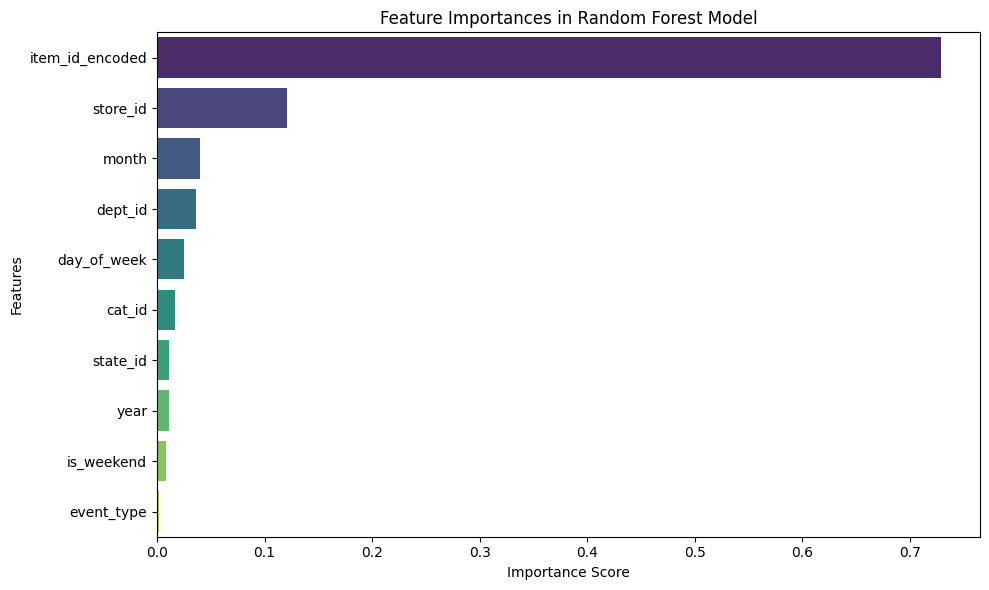

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Retrieve feature importances from the model
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()